In [169]:
# importing libraries for eda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# setting up the environment
import warnings
warnings.filterwarnings("ignore")
# importing custom helper functions
import sys
sys.path.append('../')  # Add parent directory to Python path
from utils import eda_helper
import missingno as msno


In [90]:
df=pd.read_csv("/Users/sudhanvasavyasachi/Desktop/Projects/Credit Card Default/Data/processed_train.csv")

In [91]:
df

,marriage,sex,education,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,pay_to_bill_ratio,next_month_default,avg_bill_amt
0,1,1,2,410000,50.0,0,0,0,0,0,...,213766.54,9000.01,10999.64,9999.83,7500.03,7999.79,7999.80,0.04,0,240894.29
1,1,1,2,210000,29.0,0,0,0,0,0,...,45685.46,5087.90,1999.86,1600.20,1999.91,1799.71,1806.99,0.03,1,86463.07
2,2,0,1,50000,36.0,1,2,0,0,-2,...,0.00,1775.73,2373.91,0.00,0.05,0.00,0.21,0.03,0,25034.45
3,1,0,2,100000,46.0,2,2,2,0,0,...,18839.51,1300.20,0.00,699.89,700.10,700.01,799.77,0.04,1,18111.42
4,2,0,2,50000,28.0,0,0,0,0,0,...,19505.01,1710.46,20809.19,667.99,692.01,739.91,631.88,0.19,0,21883.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22081,2,1,1,200000,26.0,-1,-1,-1,-2,-2,...,980.40,7477.93,0.00,0.00,0.00,980.16,0.04,0.80,0,1766.13
22082,1,1,3,80000,44.0,2,0,-1,-1,-1,...,779.61,1000.08,390.16,389.85,780.11,0.00,0.22,0.04,0,10625.69
22083,2,1,1,80000,34.0,-1,2,-1,-1,-1,...,326.47,0.00,325.97,325.97,326.10,326.43,326.16,0.72,1,380.07
22084,2,1,1,230000,27.0,0,0,-1,-1,-1,...,1386.12,2027.93,6997.05,1385.96,5577.98,1385.88,3495.13,0.68,0,5131.55


# Univariate Analysis for categorical columns

In [92]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index([], dtype='object')

In [93]:
# converting marriage,sex,education,pay_1 to pay_6  and next_month_default to categorical
df['marriage'] = df['marriage'].astype('category')
df['sex'] = df['sex'].astype('category')
df['education'] = df['education'].astype('category')
for i in range(1, 7):
    df[f'pay_{i}'] = df[f'pay_{i}'].astype('category')
df['next_month_default'] = df['next_month_default'].astype('category')


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22086 entries, 0 to 22085
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   marriage            22086 non-null  category
 1   sex                 22086 non-null  category
 2   education           22086 non-null  category
 3   limit_bal           22086 non-null  int64   
 4   age                 21970 non-null  float64 
 5   pay_1               22086 non-null  category
 6   pay_2               22086 non-null  category
 7   pay_3               22086 non-null  category
 8   pay_4               22086 non-null  category
 9   pay_5               22086 non-null  category
 10  pay_6               22086 non-null  category
 11  bill_amt1           22086 non-null  float64 
 12  bill_amt2           22086 non-null  float64 
 13  bill_amt3           22086 non-null  float64 
 14  bill_amt4           22086 non-null  float64 
 15  bill_amt5           22086 non-null  

In [95]:
categorical_columns = df.select_dtypes(include=['category']).columns
categorical_columns

Index(['marriage', 'sex', 'education', 'pay_1', 'pay_2', 'pay_3', 'pay_4',
       'pay_5', 'pay_6', 'next_month_default'],
      dtype='object')

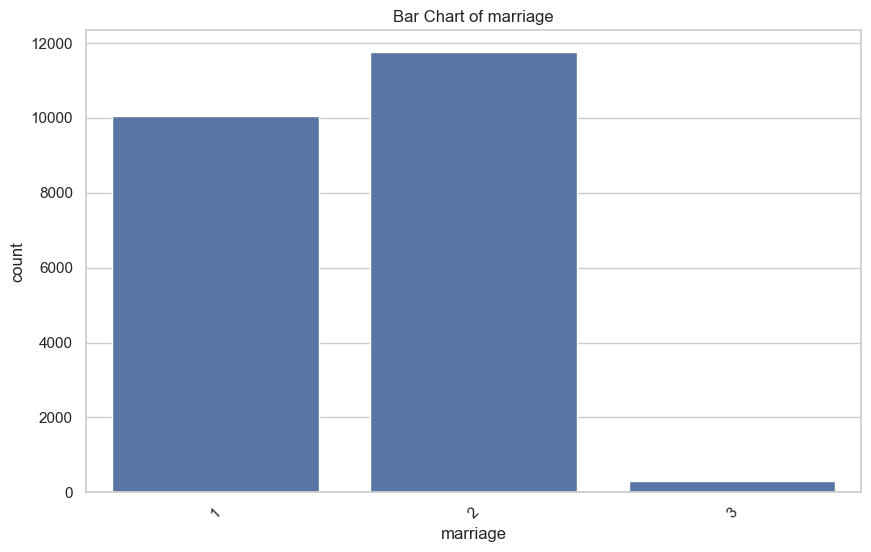

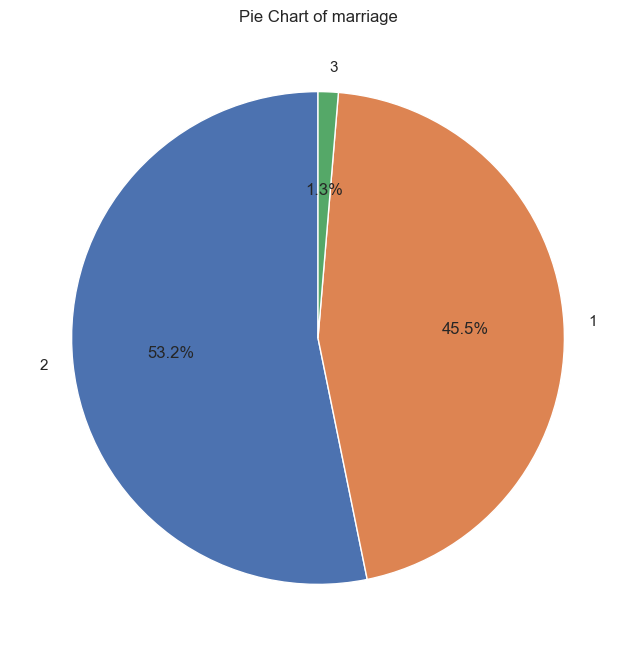

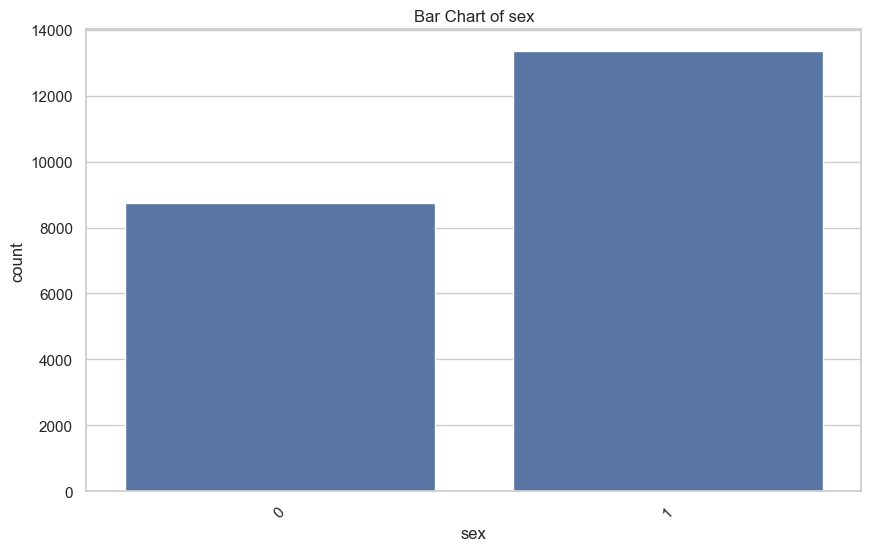

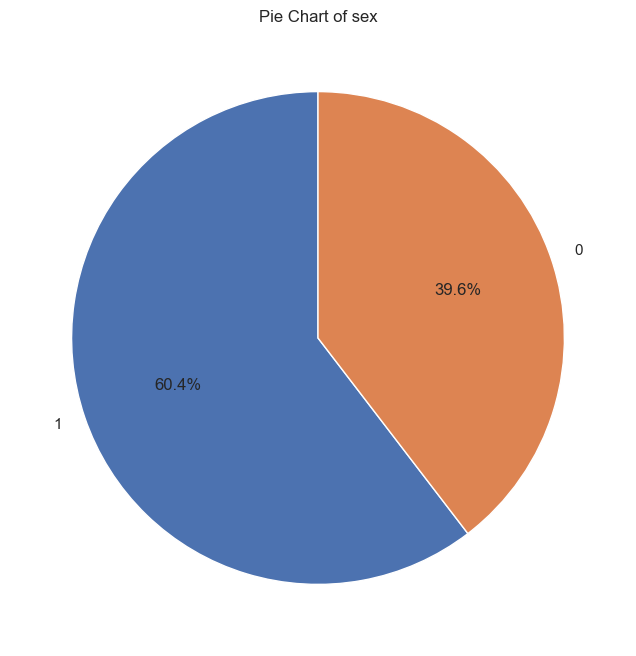

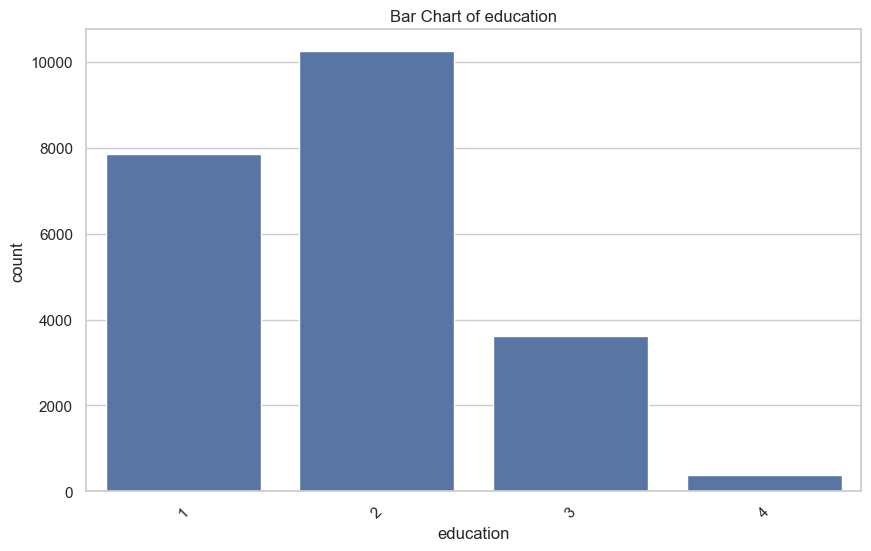

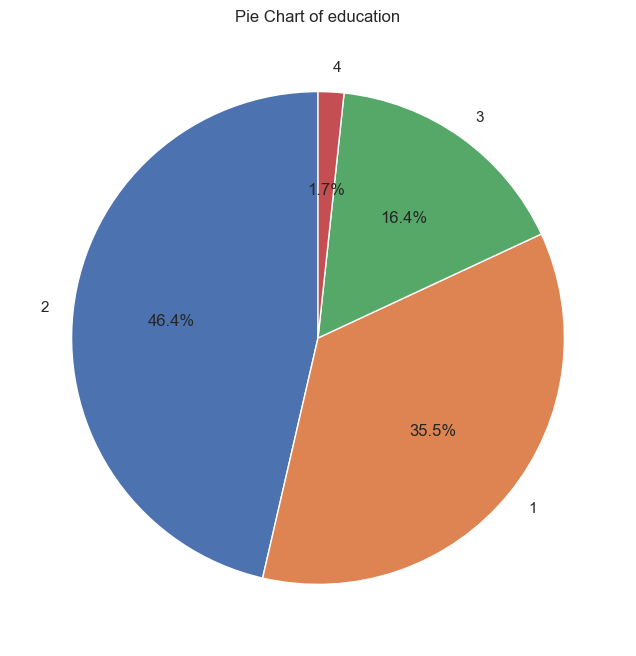

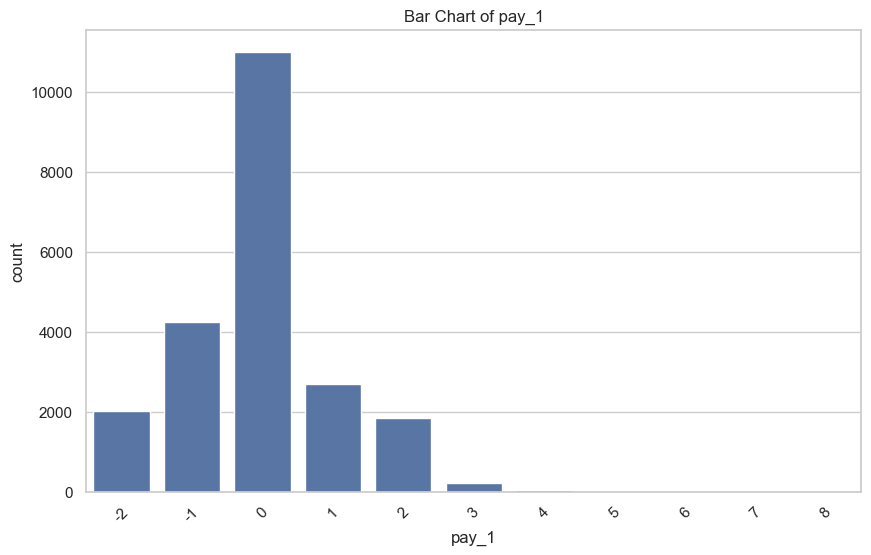

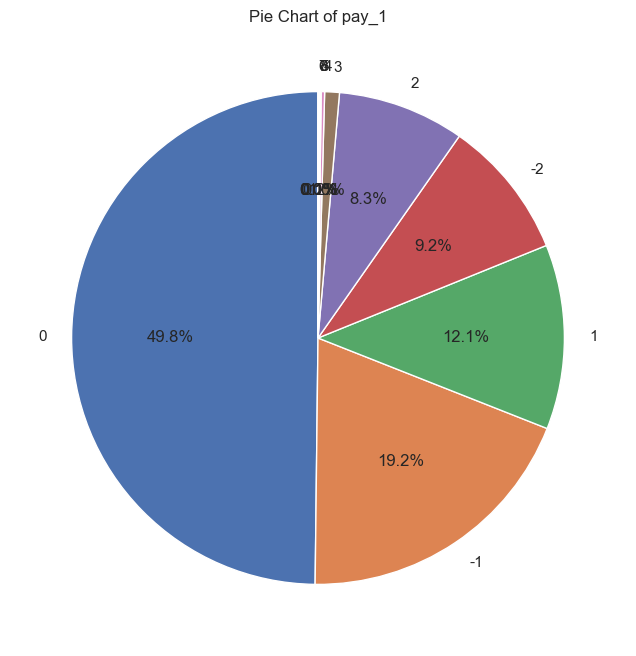

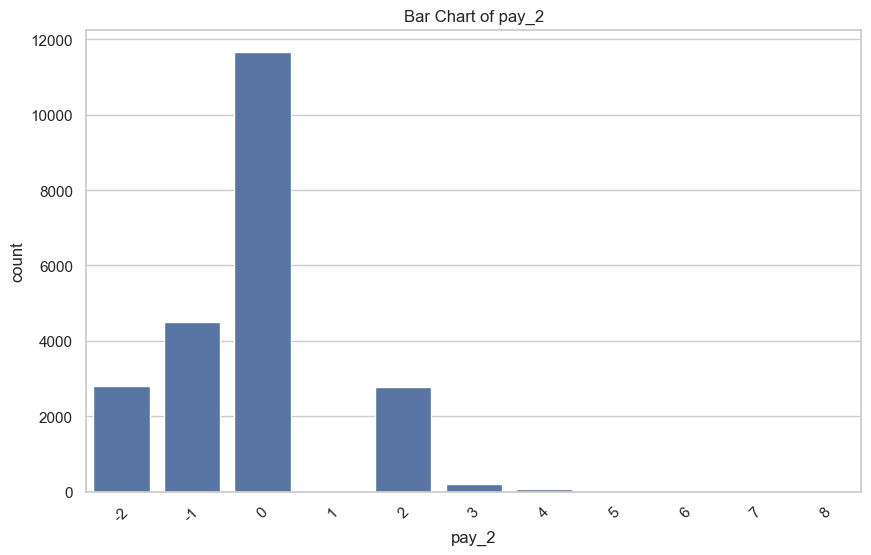

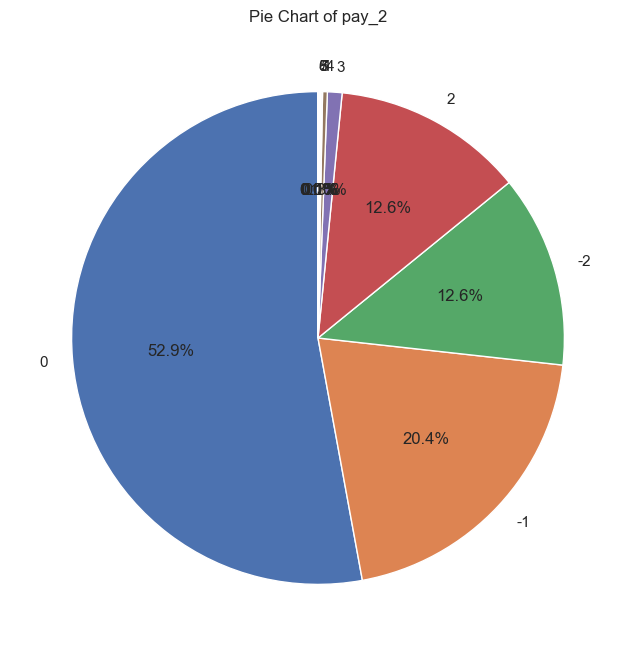

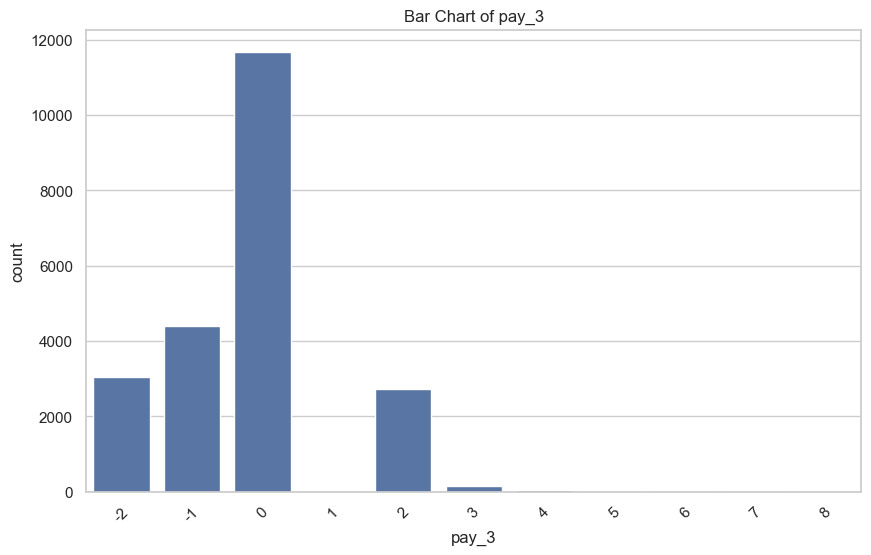

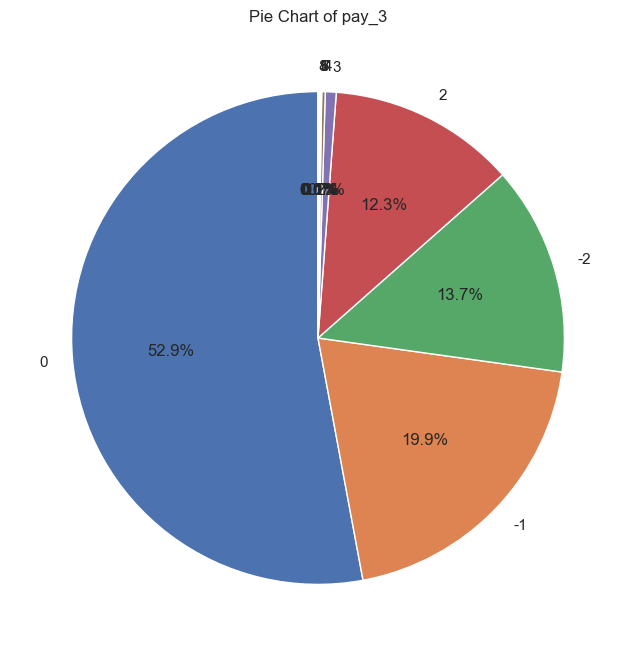

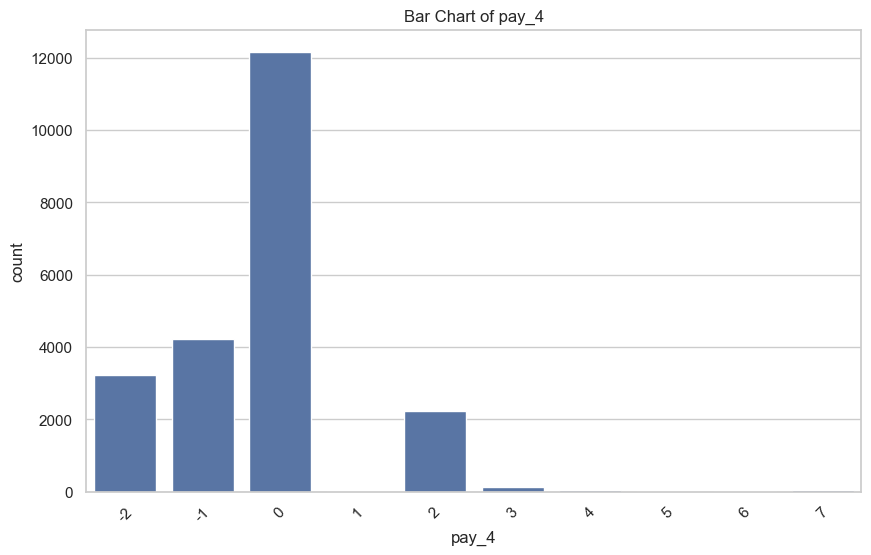

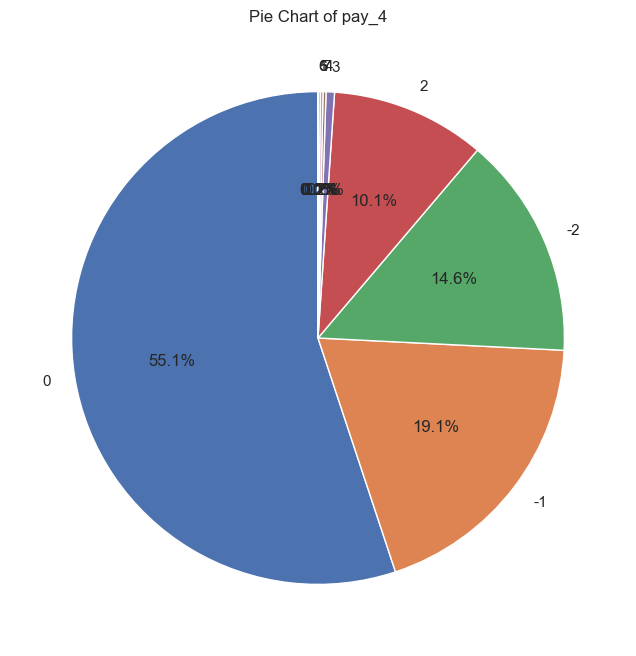

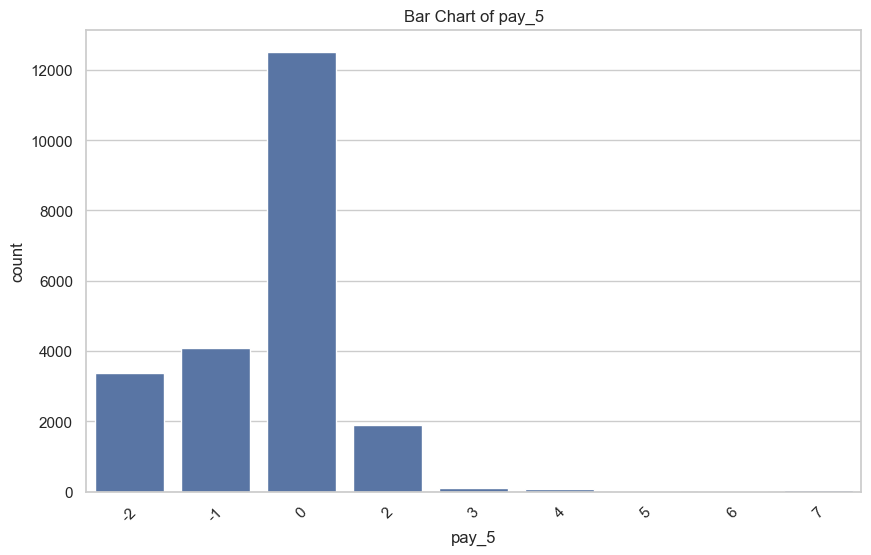

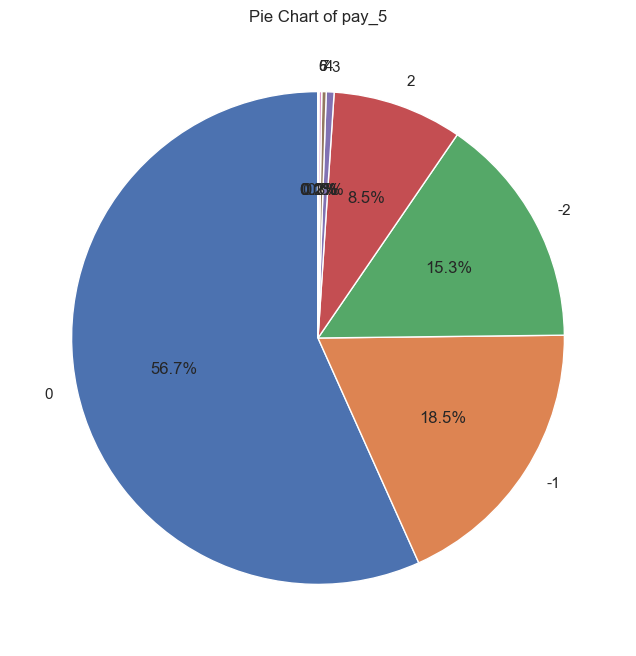

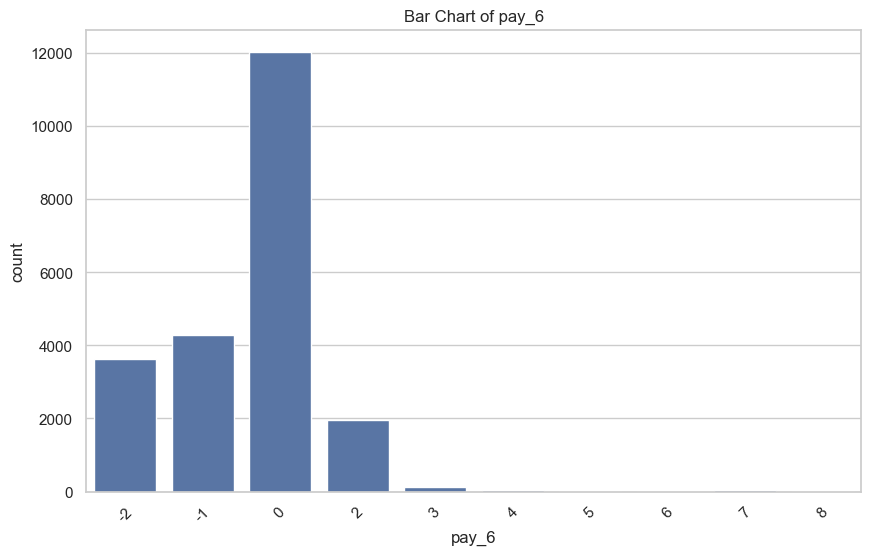

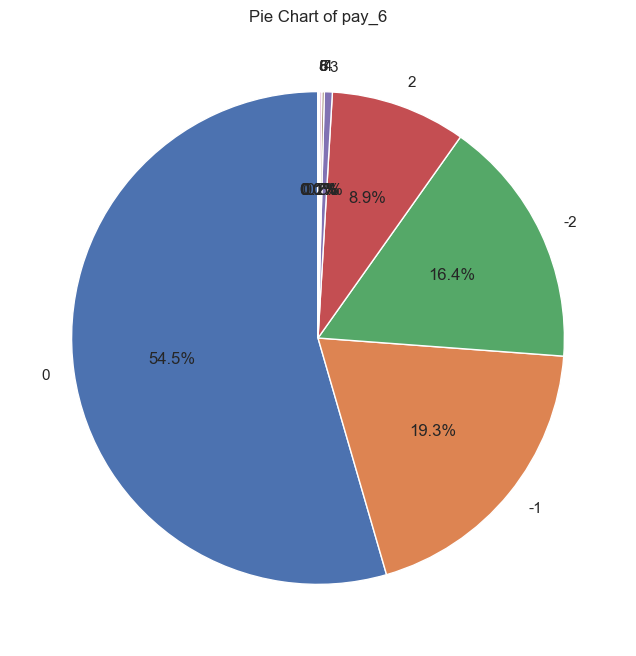

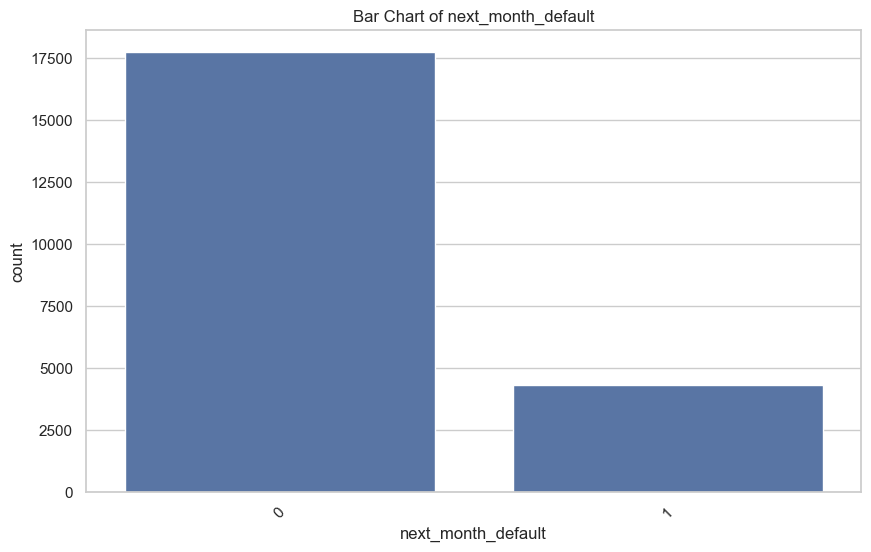

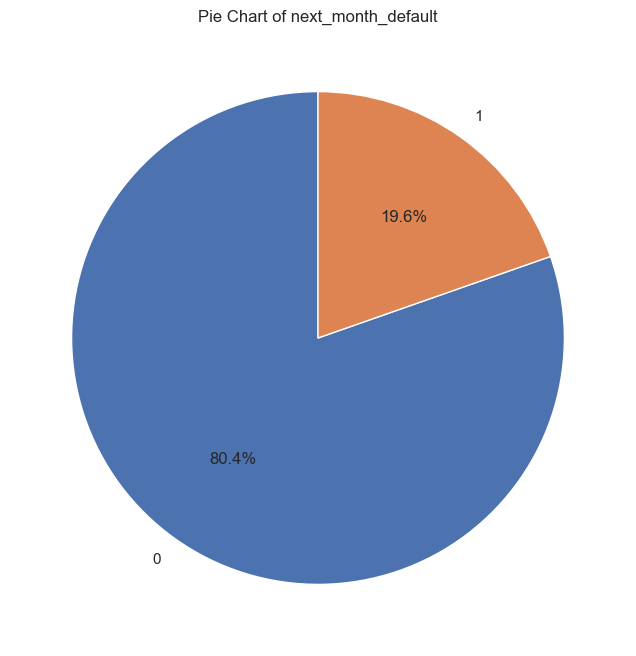

In [96]:
# bar chart and pie chart for categorical features
def bar_chart(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Bar Chart of {column}')
    plt.xticks(rotation=45)
    plt.show()
def pie_chart(df, column):
    plt.figure(figsize=(8, 8))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {column}')
    plt.ylabel('')
    plt.show()
# bar chart for categorical features

for col in categorical_columns:
    bar_chart(df, col)
    pie_chart(df, col)

In [97]:
df.columns

Index(['marriage', 'sex', 'education', 'limit_bal', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'pay_to_bill_ratio', 'next_month_default', 'avg_bill_amt'],
      dtype='object')

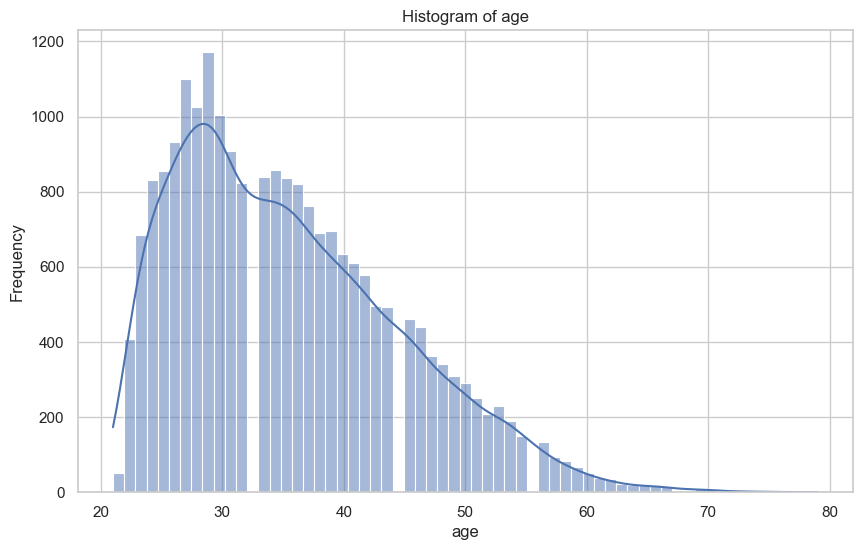

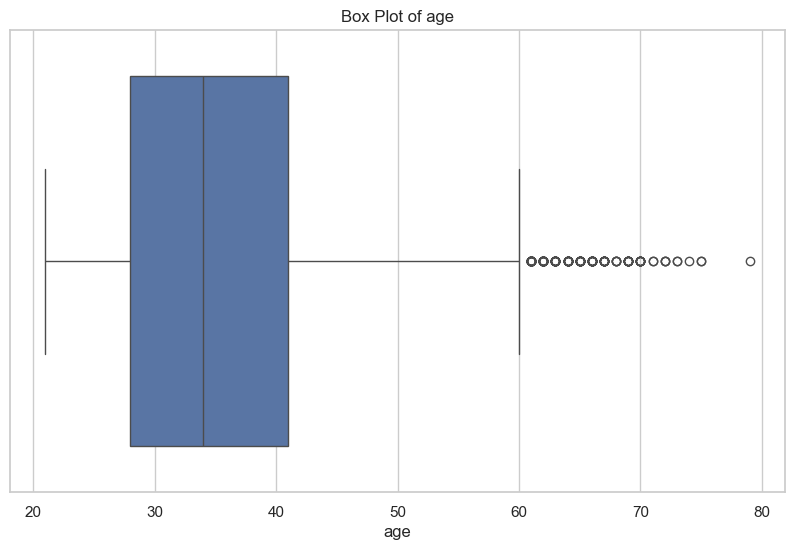

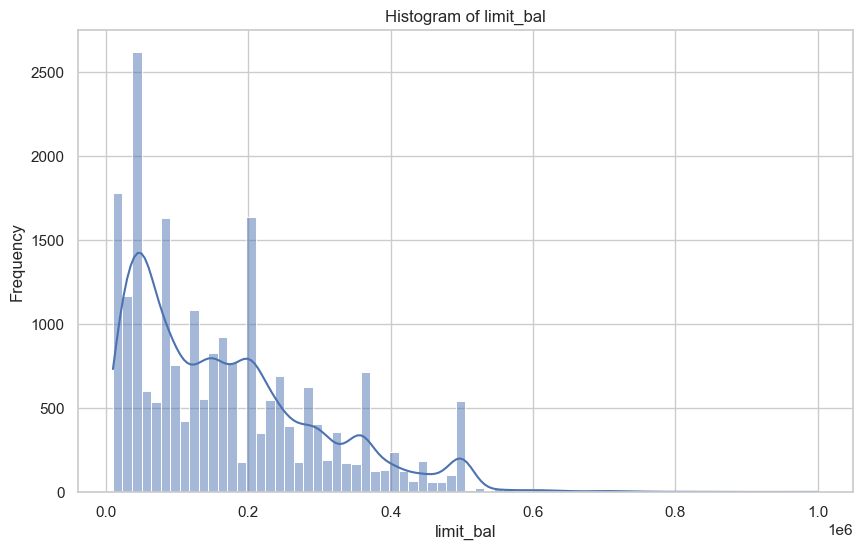

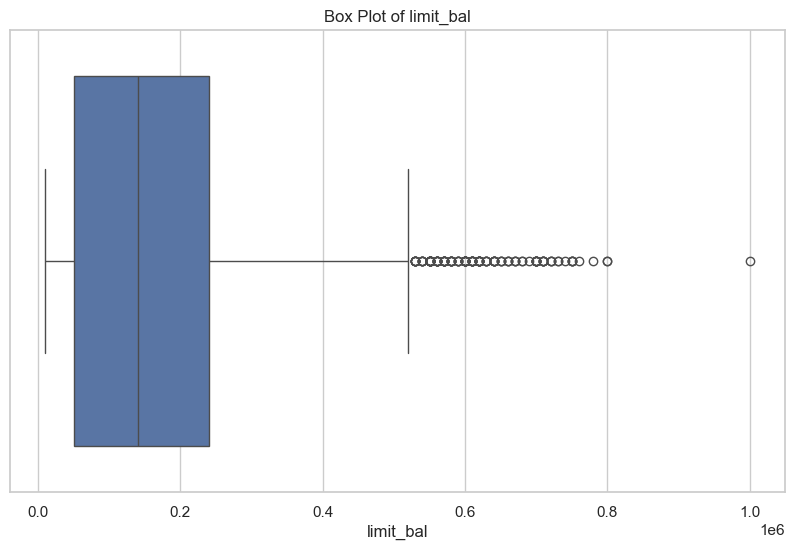

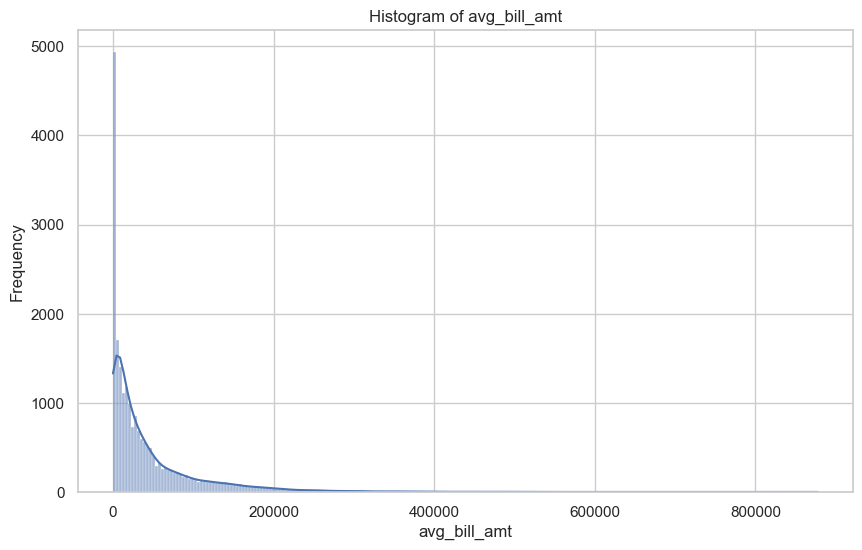

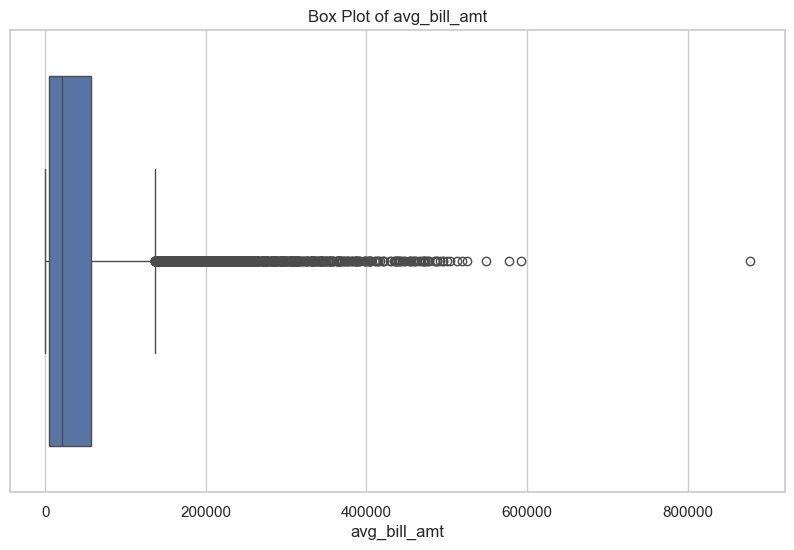

In [98]:
# same way perofrm the histogram and boxplot  for limit_balance, age
numerical_columns = ['age','limit_bal','avg_bill_amt']
def histogram(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
def boxplot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()
# histogram and boxplot for numerical features
for col in numerical_columns:
    histogram(df, col)
    boxplot(df, col)

In [99]:
numerical_columns.append('pay_to_bill_ratio')

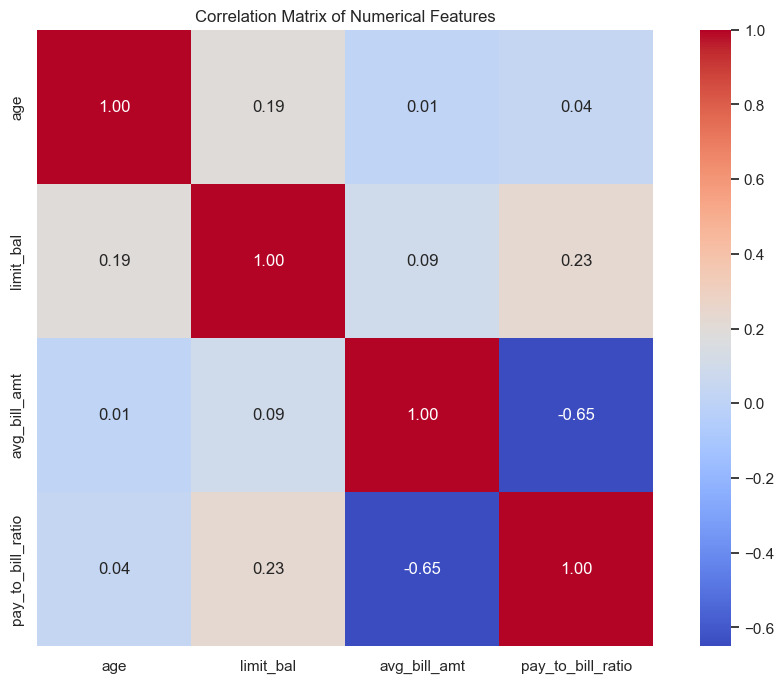

In [100]:
# use spearman correlation
correlation_matrix = df[numerical_columns].corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [145]:
eda_helper.num_summary(df,'age')

0        50.0
1        29.0
2        36.0
3        46.0
4        28.0
         ... 
22081    26.0
22082    44.0
22083    34.0
22084    27.0
22085    28.0
Name: age, Length: 22086, dtype: float64

Data Type      : float64
Missing Data   : 116 rows (0.53 %)
Available Data : 21,970 / 22,086 rows


,value
percentile,
0,21.0
5,23.0
10,25.0
25,28.0
50,34.0
75,41.0
90,49.0
95,53.0
99,60.0


,value
mean,35.465817
trimmed mean (5%),35.075108
trimmed mean (10%),34.759310
median,34.000000


,value
var,84.817280
std,9.209630
IQR,13.000000
mad,6.000000
coef_variance,0.259676


,value
skewness,0.738450
kurtosis,0.071464


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 3.407800377744168e-64
Test Statistic       : 0.9498297379802393
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 291.1948076623594
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


# Bivariate Analysis

## Limit vs Marriage

([0, 1, 2], [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

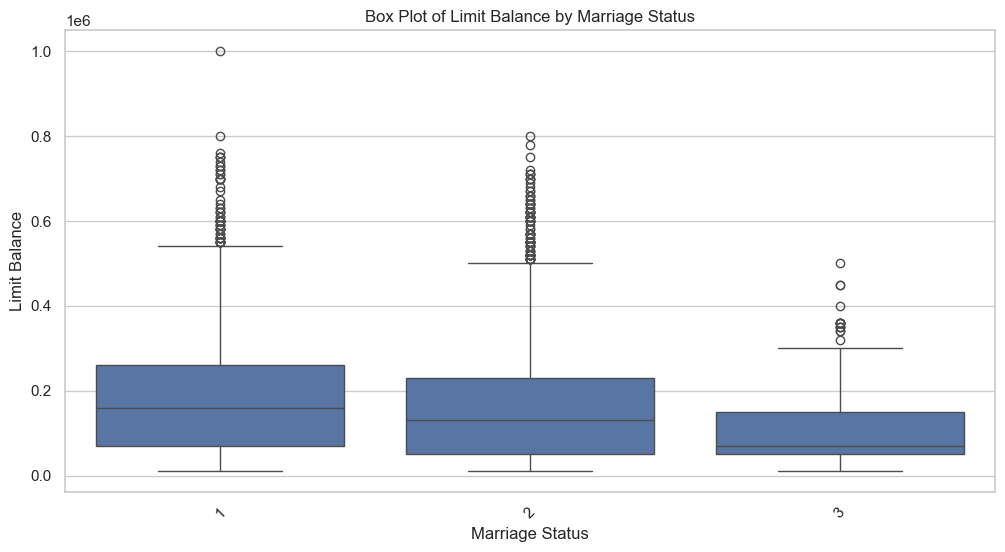

In [101]:
# want to see the realtion between marriage and limit_bal
# boxplot for marriage and limit_bal
plt.figure(figsize=(12, 6))
sns.boxplot(x='marriage', y='limit_bal', data=df)
plt.title('Box Plot of Limit Balance by Marriage Status')
plt.xlabel('Marriage Status')
plt.ylabel('Limit Balance')
plt.xticks(rotation=45)

In [102]:
# print out the mean limit balance for each marriage status
mean_limit_bal_by_marriage = df.groupby('marriage')['limit_bal'].mean()
print(mean_limit_bal_by_marriage)


marriage
1    182886.499403
2    158099.574468
3    106404.109589
Name: limit_bal, dtype: float64


In [103]:
eda_helper.num_cat_hyp_testing(df,'limit_bal','marriage')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 133.36483813688056
- p-value              : 2.675386841688787e-58
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables limit_bal and marriage are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 301.44102691097345
- p-value              : 3.490701371678348e-66
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables limit_bal and marriage are associated to each other


## Limit vs Sex

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

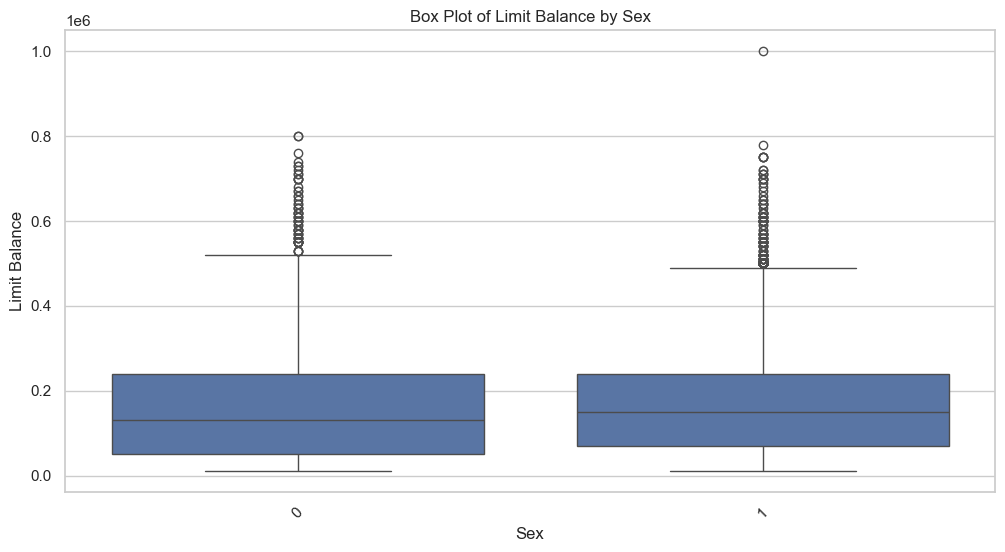

In [104]:
# relation between sex and limit_bal
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='limit_bal', data=df)
plt.title('Box Plot of Limit Balance by Sex')
plt.xlabel('Sex')
plt.ylabel('Limit Balance')
plt.xticks(rotation=45)

In [105]:
#print out the mean limit balance for each sex
mean_limit_bal_by_sex = df.groupby('sex')['limit_bal'].mean()
print(mean_limit_bal_by_sex)


sex
0    164970.951510
1    171124.718933
Name: limit_bal, dtype: float64


In [106]:
eda_helper.num_cat_hyp_testing(df,'limit_bal','sex')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 11.78737764251861
- p-value              : 0.0005974306052249147
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables limit_bal and sex are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 64.22286872460882
- p-value              : 1.111115355948081e-15
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables limit_bal and sex are associated to each other


## Limit vs Education

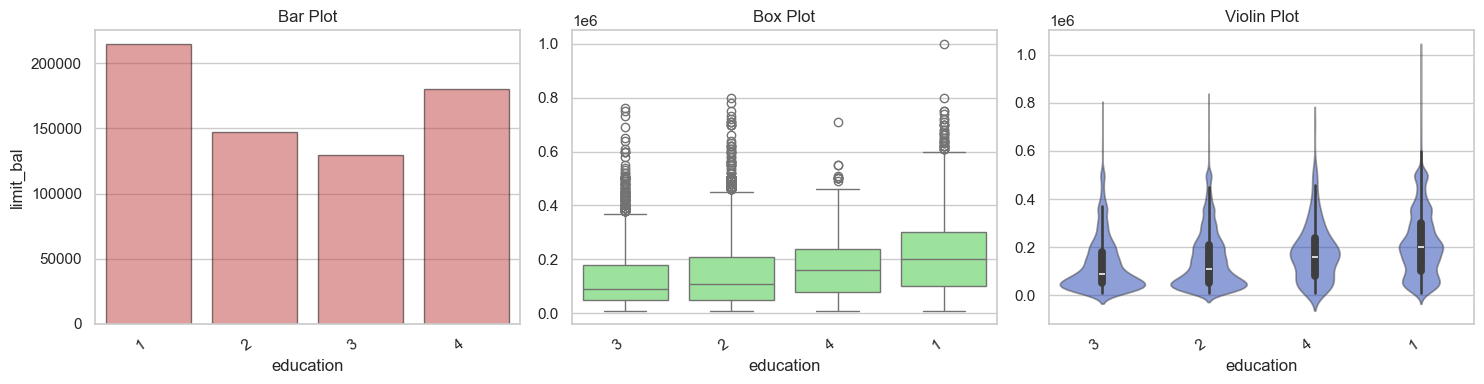

In [107]:
eda_helper.num_cat_bivar_plots(df,'limit_bal','education')

In [108]:
eda_helper.num_cat_hyp_testing(df,'limit_bal','education')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 567.8823326973305
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables limit_bal and education are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 1742.3858794385662
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables limit_bal and education are associated to each other


## Age vs Limit

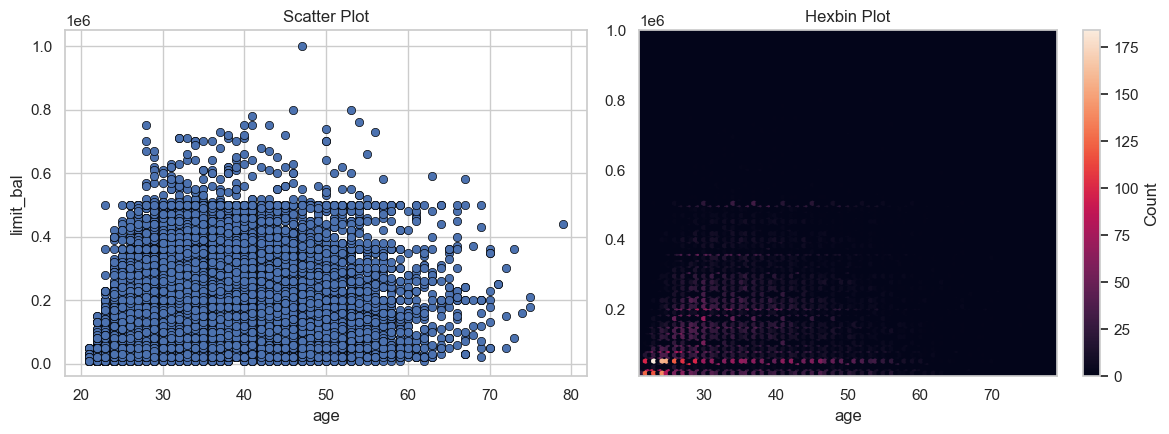

In [109]:
eda_helper.num_bivar_plots(df,'age','limit_bal')

In [110]:
eda_helper.num_num_hyp_testing(df,'age','limit_bal')

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.14637175412144895
- p-value              : 1.78636037554514e-105
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables age and limit_bal are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.19075351280091787
- p-value              : 4.337496879033396e-179
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables age and limit_bal are correlated


In [111]:
# create a new columns called total_pay and total_bill
df['total_pay'] = df[[f'pay_amt{i}' for i in range(1, 7)]].apply(lambda x: x.sum(), axis=1)
df['total_bill'] = df[[f'bill_amt{i}' for i in range(1, 7)]].apply(lambda x: x.sum(), axis=1)

In [112]:
df

,marriage,sex,education,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,pay_to_bill_ratio,next_month_default,avg_bill_amt,total_pay,total_bill
0,1,1,2,410000,50.0,0,0,0,0,0,...,10999.64,9999.83,7500.03,7999.79,7999.80,0.04,0,240894.29,53499.10,1445365.72
1,1,1,2,210000,29.0,0,0,0,0,0,...,1999.86,1600.20,1999.91,1799.71,1806.99,0.03,1,86463.07,14294.57,518778.43
2,2,0,1,50000,36.0,1,2,0,0,-2,...,2373.91,0.00,0.05,0.00,0.21,0.03,0,25034.45,4149.90,150206.72
3,1,0,2,100000,46.0,2,2,2,0,0,...,0.00,699.89,700.10,700.01,799.77,0.04,1,18111.42,4199.97,108668.54
4,2,0,2,50000,28.0,0,0,0,0,0,...,20809.19,667.99,692.01,739.91,631.88,0.19,0,21883.74,25251.44,131302.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22081,2,1,1,200000,26.0,-1,-1,-1,-2,-2,...,0.00,0.00,0.00,980.16,0.04,0.80,0,1766.13,8458.13,10596.76
22082,1,1,3,80000,44.0,2,0,-1,-1,-1,...,390.16,389.85,780.11,0.00,0.22,0.04,0,10625.69,2560.42,63754.14
22083,2,1,1,80000,34.0,-1,2,-1,-1,-1,...,325.97,325.97,326.10,326.43,326.16,0.72,1,380.07,1630.63,2280.43
22084,2,1,1,230000,27.0,0,0,-1,-1,-1,...,6997.05,1385.96,5577.98,1385.88,3495.13,0.68,0,5131.55,20869.93,30789.28


Following relations needs to be checked

- total_pay vs total_bill
- total_bill vs education
- total_bill vs marriage
- total_bill vs age
- total_pay vs education
- total_pay vs age 
- total_pay vs marriage

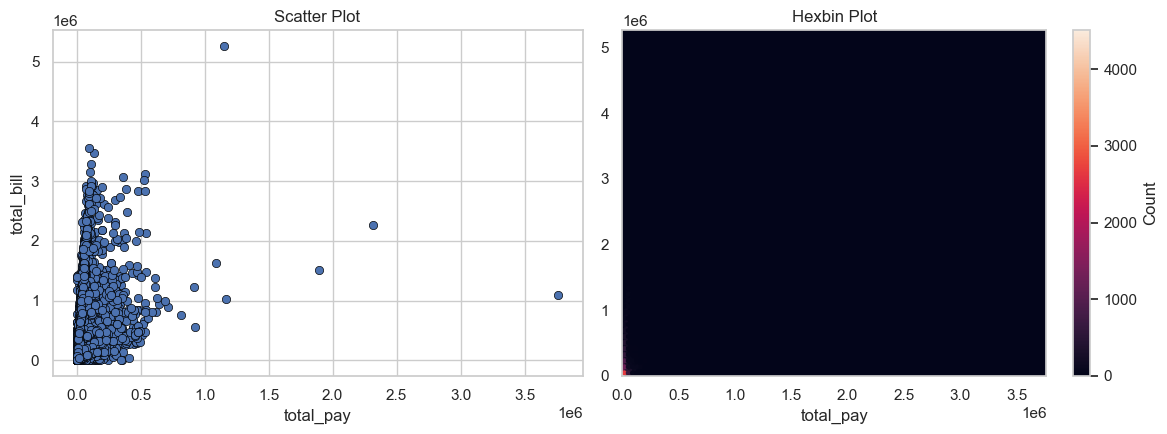

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.34238553875279404
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables total_pay and total_bill are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5987956771503815
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables total_pay and total_bill are correlated


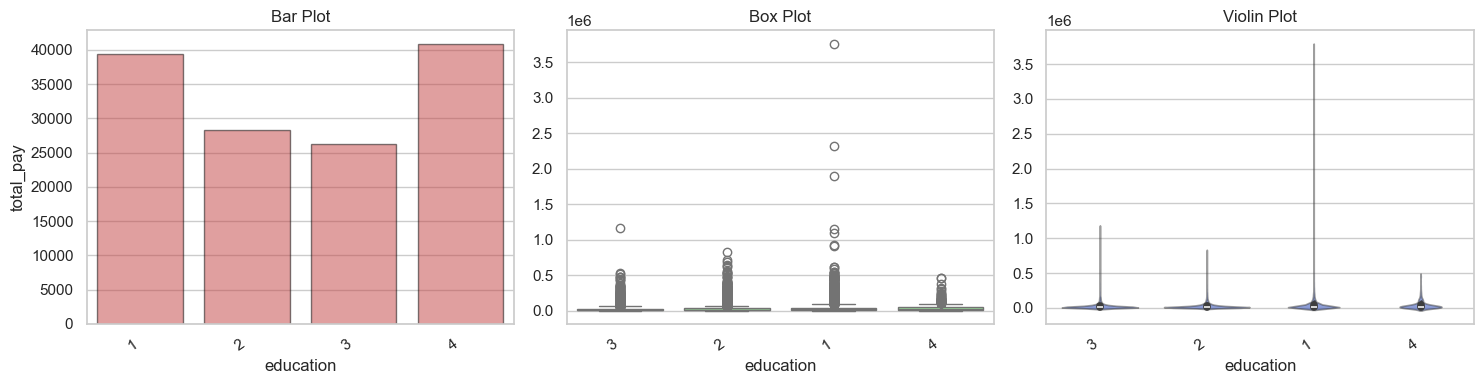

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 59.54959323113752
- p-value              : 2.463813010720921e-38
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables total_pay and education are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 185.17612098399462
- p-value              : 6.723190039373653e-40
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables total_pay and education are associated to each other


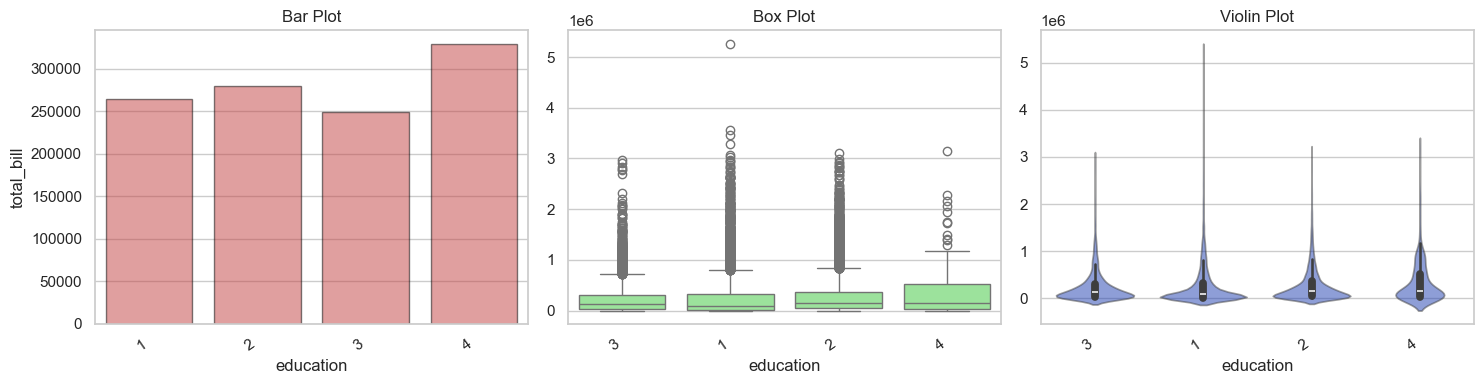

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 9.547886764763511
- p-value              : 2.683877630819768e-06
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables total_bill and education are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 221.08456426321328
- p-value              : 1.170219552802618e-47
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables total_bill and education are associated to each other


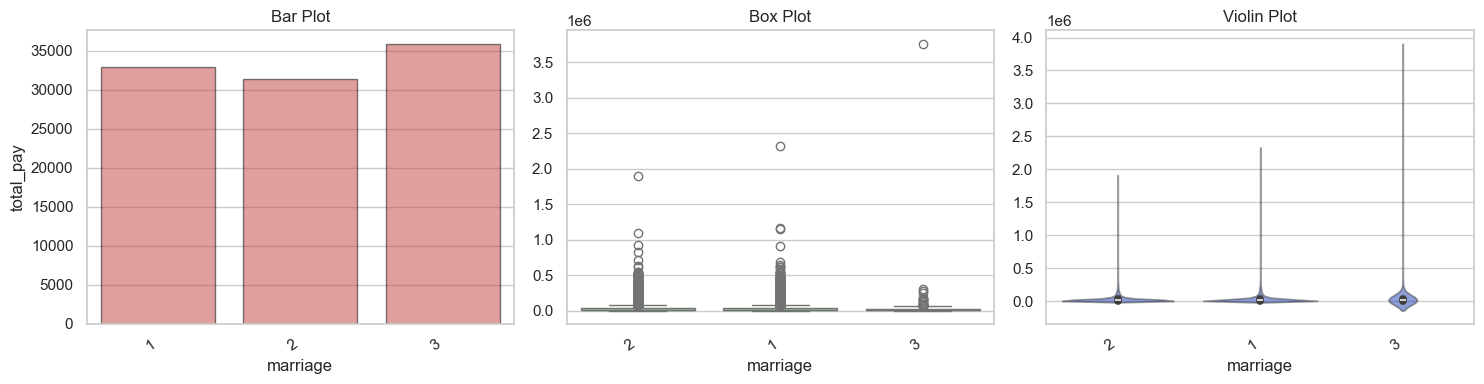

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 2.017643495383177
- p-value              : 0.132992948219022
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables total_pay and marriage are not associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 13.438334524509777
- p-value              : 0.0012075433623241298
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables total_pay and marriage are associated to each other


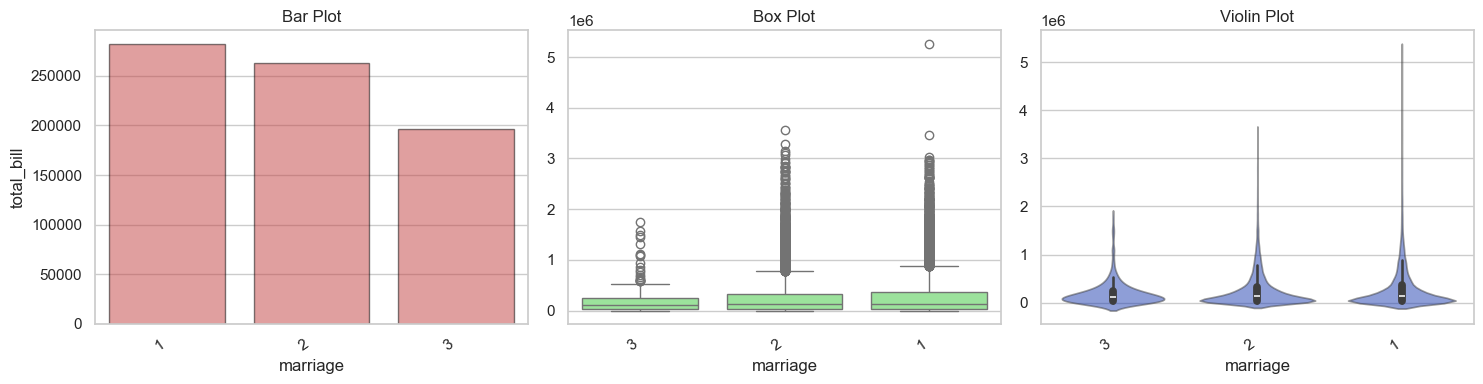

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 12.670031288881207
- p-value              : 3.166868015222575e-06
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables total_bill and marriage are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 2.7864007240462345
- p-value              : 0.24827944768029492
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables total_bill and marriage are not associated to each other


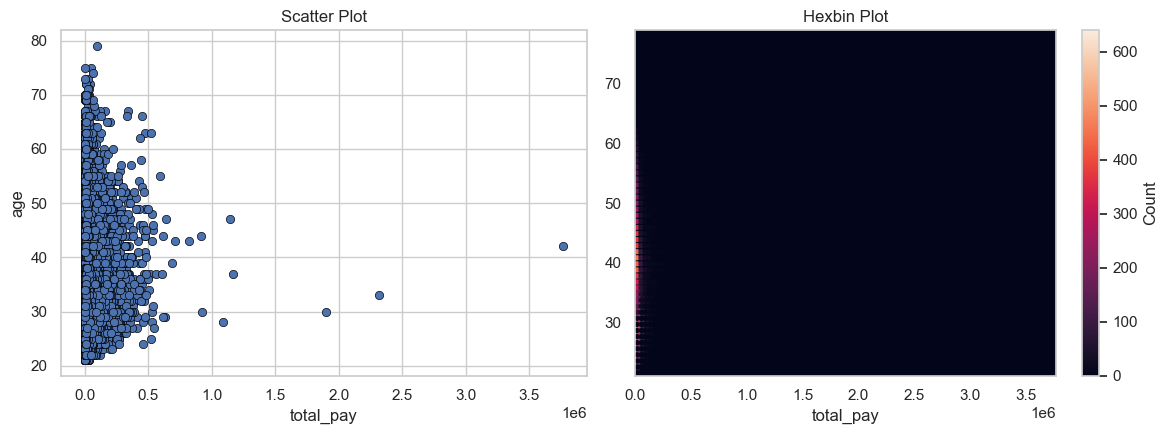

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.04144113848717554
- p-value              : 8.005834717631127e-10
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables total_pay and age are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.04923357414758968
- p-value              : 2.8446910000048966e-13
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables total_pay and age are correlated


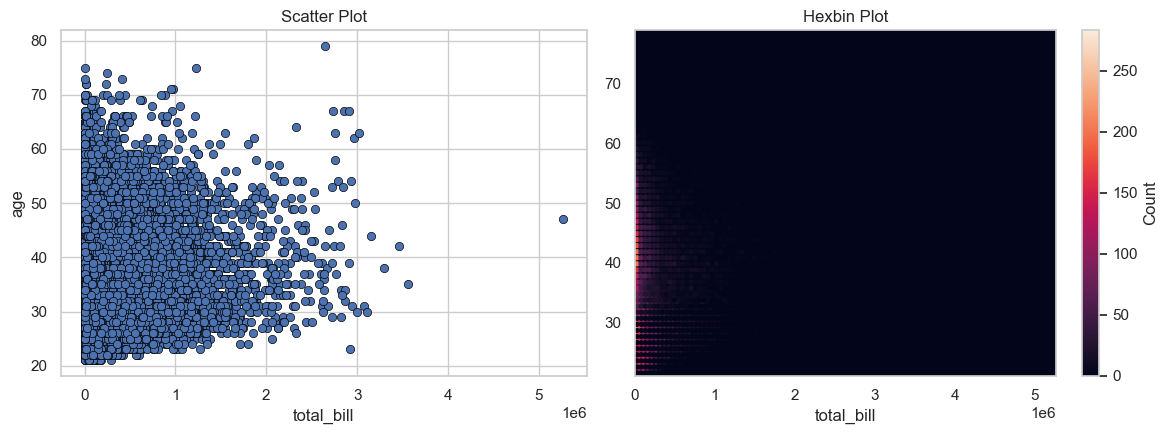

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.05954780691338886
- p-value              : 1.0128726078288307e-18
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables total_bill and age are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.009435658074706043
- p-value              : 0.16195359125400513
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables total_bill and age are uncorrelated


In [113]:
# do the above mentioned analysis for total_pay and total_bill
eda_helper.num_bivar_plots(df,'total_pay','total_bill')
eda_helper.num_num_hyp_testing(df,'total_pay','total_bill')
eda_helper.num_cat_bivar_plots(df,'total_pay','education')
eda_helper.num_cat_hyp_testing(df,'total_pay','education')
eda_helper.num_cat_bivar_plots(df,'total_bill','education')
eda_helper.num_cat_hyp_testing(df,'total_bill','education')
eda_helper.num_cat_bivar_plots(df,'total_pay','marriage')
eda_helper.num_cat_hyp_testing(df,'total_pay','marriage')
eda_helper.num_cat_bivar_plots(df,'total_bill','marriage')
eda_helper.num_cat_hyp_testing(df,'total_bill','marriage')
eda_helper.num_bivar_plots(df,'total_pay','age')
eda_helper.num_num_hyp_testing(df,'total_pay','age')
eda_helper.num_bivar_plots(df,'total_bill','age')
eda_helper.num_num_hyp_testing(df,'total_bill','age')


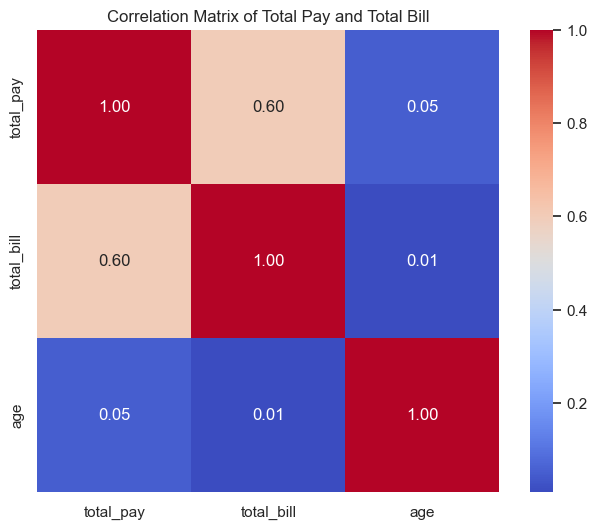

In [114]:
# correlation between total_pay and total_bill
correlation_matrix = df[['total_pay', 'total_bill','age']].corr(method='spearman')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Total Pay and Total Bill')
plt.show()

## Normality tests for total_pay and total_bill

In [115]:
## testing the normality of total_pay and total_bill
eda_helper.num_summary(df,'total_pay')

0         53499.10
1         14294.57
2          4149.90
3          4199.97
4         25251.44
           ...    
22081      8458.13
22082      2560.42
22083      1630.63
22084     20869.93
22085    227335.28
Name: total_pay, Length: 22086, dtype: float64

Data Type      : float64
Missing Data   : 0 rows (0.00 %)
Available Data : 22,086 / 22,086 rows


,value
percentile,
0,0.000000e+00
5,2.528975e+02
10,2.434680e+03
25,6.742038e+03
50,1.458428e+04
75,3.361859e+04
90,7.280990e+04
95,1.212139e+05
99,2.717869e+05


,value
mean,32132.567853
trimmed mean (5%),23274.205626
trimmed mean (10%),20247.007059
median,14584.280000


,value
var,3.982141e+09
std,6.310420e+04
IQR,2.687655e+04
mad,1.017109e+04
coef_variance,1.963871e+00


,value
skewness,16.241031
kurtosis,694.929893


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 9.42525376729414e-124
Test Statistic       : 0.40702162385286345
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 3236.7872092249345
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [116]:
eda_helper.num_summary(df,'total_bill')

0        1445365.72
1         518778.43
2         150206.72
3         108668.54
4         131302.41
            ...    
22081      10596.76
22082      63754.14
22083       2280.43
22084      30789.28
22085     346377.43
Name: total_bill, Length: 22086, dtype: float64

Data Type      : float64
Missing Data   : 0 rows (0.00 %)
Available Data : 22,086 / 22,086 rows


,value
percentile,
0,0.000000e+00
5,1.300858e+03
10,4.344875e+03
25,2.916041e+04
50,1.275838e+05
75,3.444870e+05
90,7.469152e+05
95,1.041154e+06
99,1.792574e+06


,value
mean,270397.768024
trimmed mean (5%),217663.089559
trimmed mean (10%),189847.665675
median,127583.780000


,value
var,1.430978e+11
std,3.782827e+05
IQR,3.153266e+05
mad,1.158809e+05
coef_variance,1.398986e+00


,value
skewness,2.740878
kurtosis,10.816713


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.1485464584498342e-105
Test Statistic       : 0.6966838135381377
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 1954.0036582083922
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


## Default vs Marriage

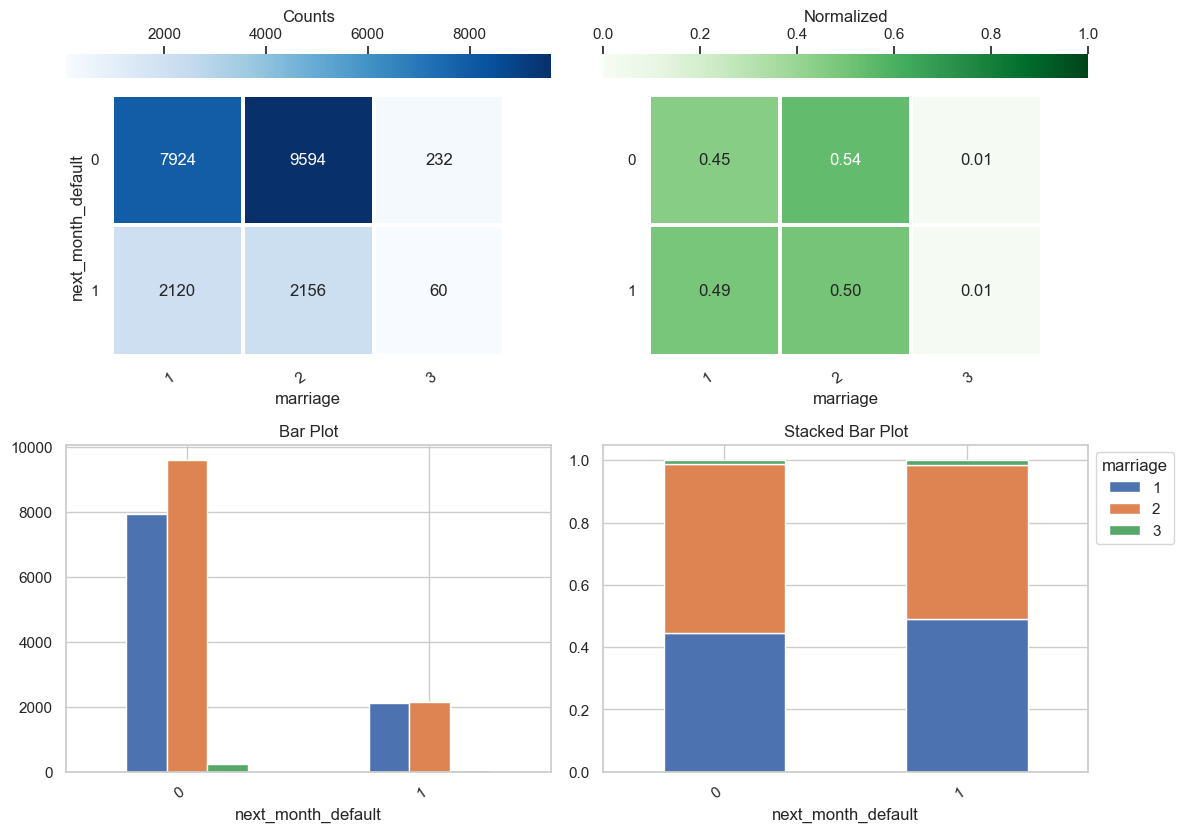

In [117]:
eda_helper.cat_bivar_plots(df,'next_month_default','marriage')

In [118]:
eda_helper.hyp_cat_cat(df,'next_month_default','marriage')

- Cramers V            : 0.03314809696880235
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 26.267007516094253
- p-value              : 1.9778428872055653e-06
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables next_month_default and marriage are correlated


## Sex vs default

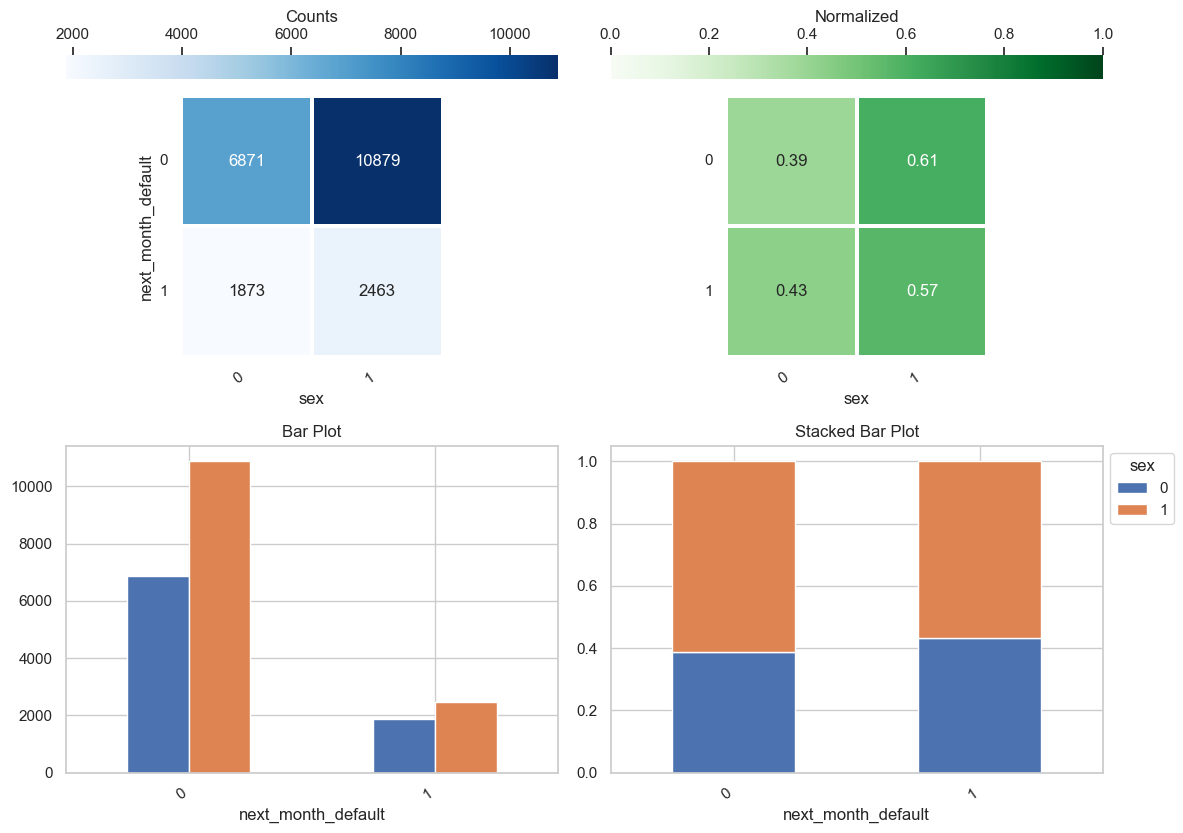

In [119]:
eda_helper.cat_bivar_plots(df,'next_month_default','sex')

In [120]:
eda_helper.hyp_cat_cat(df,'next_month_default','sex')

- Cramers V            : 0.03569730829734554
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 29.142912569440448
- p-value              : 6.72312337142174e-08
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables next_month_default and sex are correlated


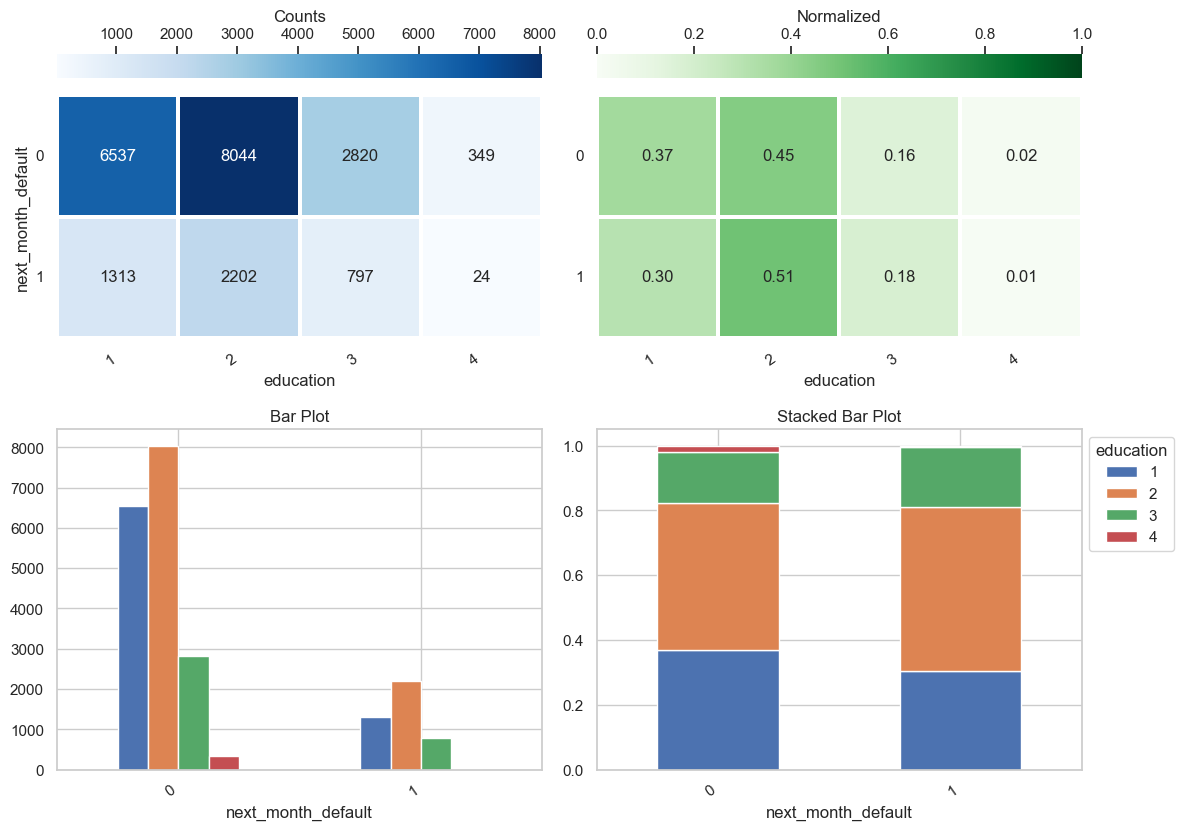

In [121]:
eda_helper.cat_bivar_plots(df,'next_month_default','education')

In [122]:
eda_helper.hyp_cat_cat(df,'next_month_default','education')

- Cramers V            : 0.07243415631672186
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 118.87365972528417
- p-value              : 1.3489754265148646e-25
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables next_month_default and education are correlated


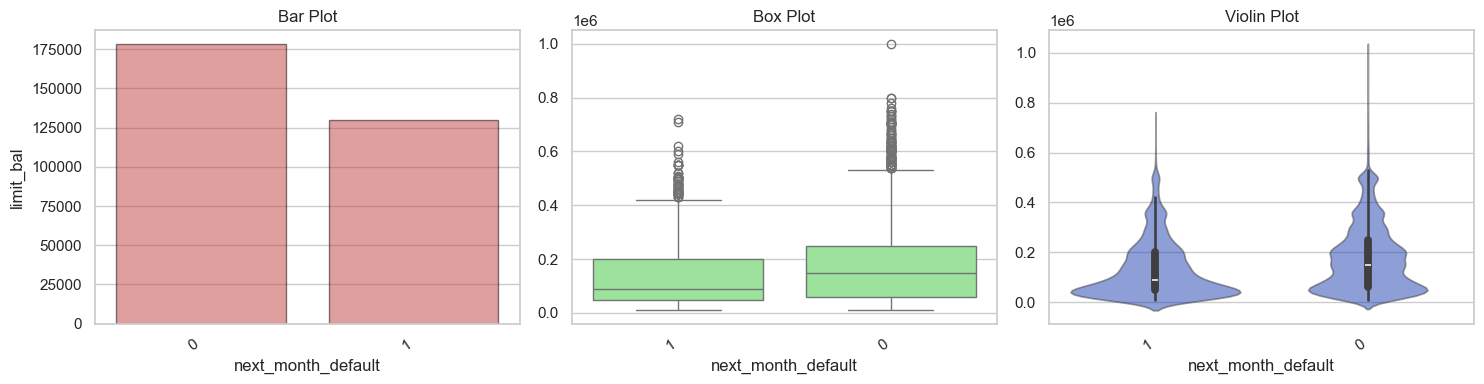

In [123]:
eda_helper.num_cat_bivar_plots(df,'limit_bal','next_month_default')

In [124]:
eda_helper.num_cat_hyp_testing(df,'limit_bal','next_month_default')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 483.4259419875425
- p-value              : 5.265460637162013e-106
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables limit_bal and next_month_default are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 562.7436188328321
- p-value              : 2.1271211864034276e-124
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables limit_bal and next_month_default are associated to each other


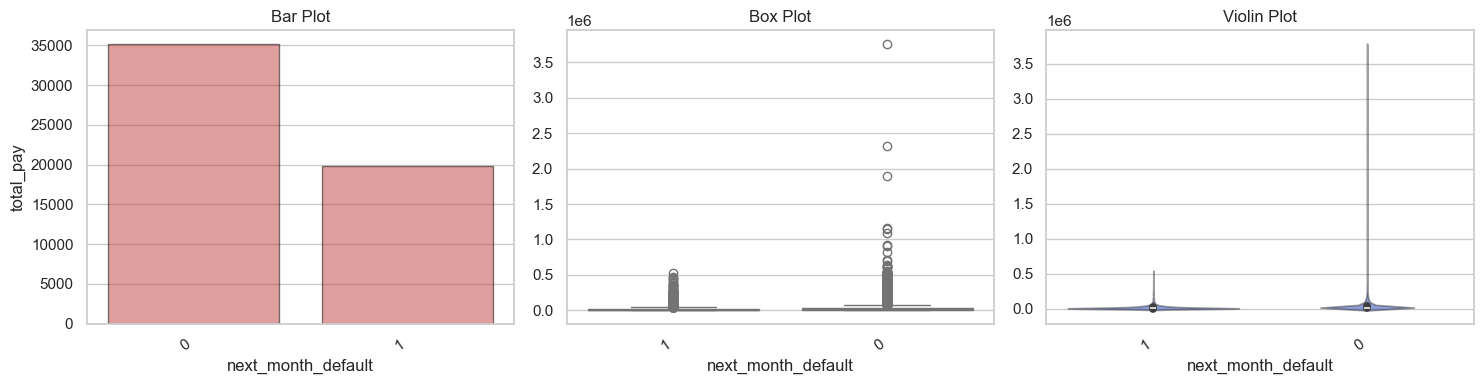

In [125]:
eda_helper.num_cat_bivar_plots(df,'total_pay','next_month_default')

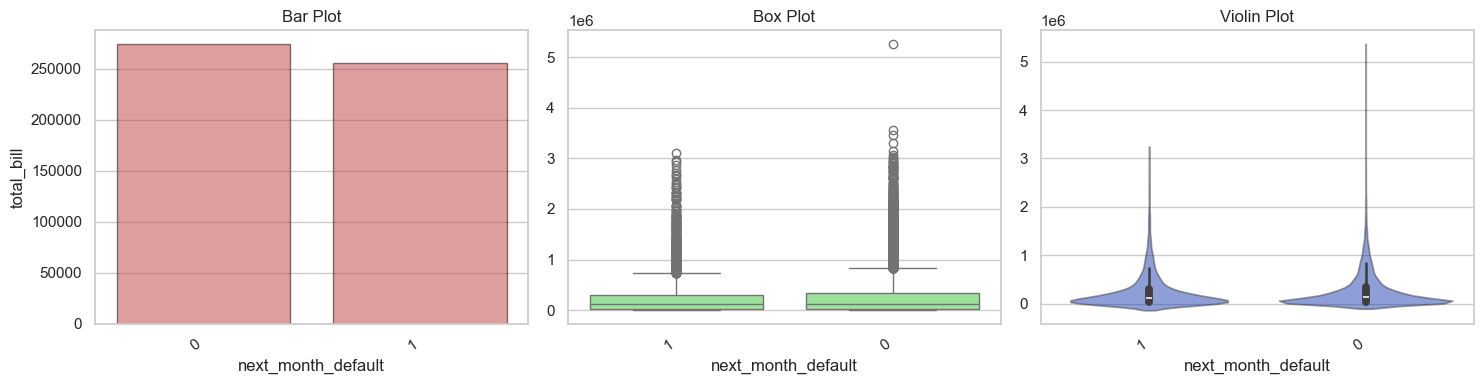

In [126]:
eda_helper.num_cat_bivar_plots(df, 'total_bill', 'next_month_default')

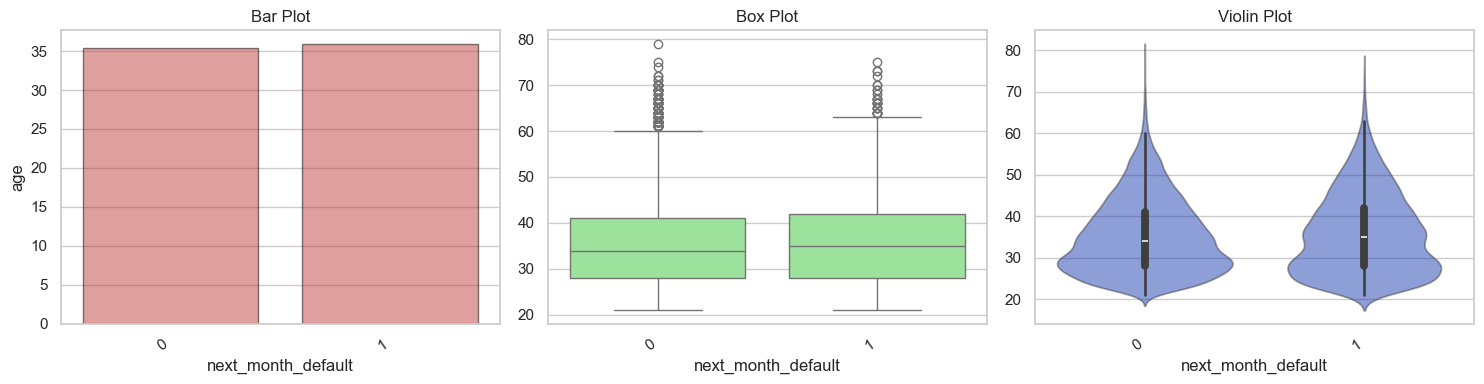

In [143]:
eda_helper.num_cat_bivar_plots(df,'age','next_month_default')

In [144]:
eda_helper.num_cat_hyp_testing(df,'age','next_month_default')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 10.429311110972092
- p-value              : 0.0012421327265209
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables age and next_month_default are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3.431684280006987
- p-value              : 0.06395684443243792
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables age and next_month_default are not associated to each other


# Temporal Analysis 

In [127]:
df

,marriage,sex,education,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,pay_to_bill_ratio,next_month_default,avg_bill_amt,total_pay,total_bill
0,1,1,2,410000,50.0,0,0,0,0,0,...,10999.64,9999.83,7500.03,7999.79,7999.80,0.04,0,240894.29,53499.10,1445365.72
1,1,1,2,210000,29.0,0,0,0,0,0,...,1999.86,1600.20,1999.91,1799.71,1806.99,0.03,1,86463.07,14294.57,518778.43
2,2,0,1,50000,36.0,1,2,0,0,-2,...,2373.91,0.00,0.05,0.00,0.21,0.03,0,25034.45,4149.90,150206.72
3,1,0,2,100000,46.0,2,2,2,0,0,...,0.00,699.89,700.10,700.01,799.77,0.04,1,18111.42,4199.97,108668.54
4,2,0,2,50000,28.0,0,0,0,0,0,...,20809.19,667.99,692.01,739.91,631.88,0.19,0,21883.74,25251.44,131302.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22081,2,1,1,200000,26.0,-1,-1,-1,-2,-2,...,0.00,0.00,0.00,980.16,0.04,0.80,0,1766.13,8458.13,10596.76
22082,1,1,3,80000,44.0,2,0,-1,-1,-1,...,390.16,389.85,780.11,0.00,0.22,0.04,0,10625.69,2560.42,63754.14
22083,2,1,1,80000,34.0,-1,2,-1,-1,-1,...,325.97,325.97,326.10,326.43,326.16,0.72,1,380.07,1630.63,2280.43
22084,2,1,1,230000,27.0,0,0,-1,-1,-1,...,6997.05,1385.96,5577.98,1385.88,3495.13,0.68,0,5131.55,20869.93,30789.28


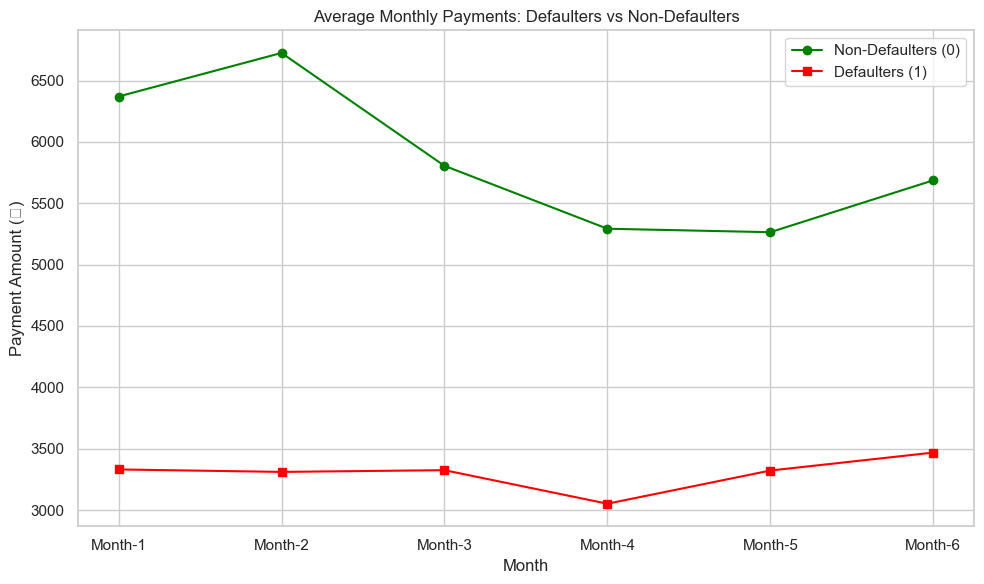

In [128]:
defaulted = df[df['next_month_default'] == 1]
non_defaulted = df[df['next_month_default'] == 0]

# Calculate average payment amount per month for each group
months = [f'Month-{i}' for i in range(1, 7)]
pay_columns = [f'pay_amt{i}' for i in range(1, 7)]

avg_pay_defaulted = [defaulted[col].mean() for col in pay_columns]
avg_pay_non_defaulted = [non_defaulted[col].mean() for col in pay_columns]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(months, avg_pay_non_defaulted, marker='o', label='Non-Defaulters (0)', color='green')
plt.plot(months, avg_pay_defaulted, marker='s', label='Defaulters (1)', color='red')
plt.title('Average Monthly Payments: Defaulters vs Non-Defaulters')
plt.xlabel('Month')
plt.ylabel('Payment Amount (₹)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

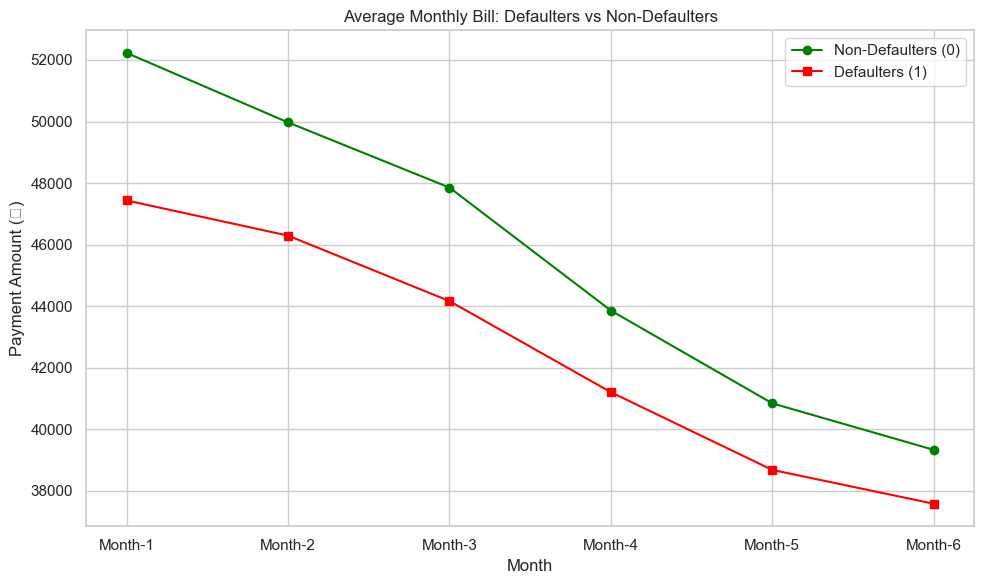

In [129]:
defaulted = df[df['next_month_default'] == 1]
non_defaulted = df[df['next_month_default'] == 0]

# Calculate average payment amount per month for each group
months = [f'Month-{i}' for i in range(1, 7)]
pay_columns = [f'bill_amt{i}' for i in range(1, 7)]

avg_pay_defaulted = [defaulted[col].mean() for col in pay_columns]
avg_pay_non_defaulted = [non_defaulted[col].mean() for col in pay_columns]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(months, avg_pay_non_defaulted, marker='o', label='Non-Defaulters (0)', color='green')
plt.plot(months, avg_pay_defaulted, marker='s', label='Defaulters (1)', color='red')
plt.title('Average Monthly Bill: Defaulters vs Non-Defaulters')
plt.xlabel('Month')
plt.ylabel('Payment Amount (₹)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Analysing Derived Columns

# Due

In [155]:
df['due'] = (df['bill_amt1']+df['bill_amt2']+df['bill_amt3']+df['bill_amt4']+df['bill_amt5']+df['bill_amt6'])-(df['pay_amt1']+df['pay_amt2']+df['pay_amt3']+df['pay_amt4']+df['pay_amt5']+df['pay_amt6'])

In [156]:
eda_helper.num_summary(df,'due')

0        1391866.62
1         504483.86
2         146056.82
3         104468.57
4         106050.97
            ...    
22081       2138.63
22082      61193.72
22083        649.80
22084       9919.35
22085     119042.15
Name: due, Length: 22086, dtype: float64

Data Type      : float64
Missing Data   : 0 rows (0.00 %)
Available Data : 22,086 / 22,086 rows


,value
percentile,
0,-2.671515e+06
5,-2.640322e+03
10,-1.101500e+01
25,4.442795e+03
50,1.024566e+05
75,3.086313e+05
90,6.926204e+05
95,9.698509e+05
99,1.702289e+06


,value
mean,238265.200171
trimmed mean (5%),188181.873174
trimmed mean (10%),160653.045084
median,102456.630000


,value
var,1.307336e+11
std,3.615710e+05
IQR,3.041885e+05
mad,1.023655e+05
coef_variance,1.517515e+00


,value
skewness,2.673282
kurtosis,10.234626


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 9.10429453480028e-106
Test Statistic       : 0.6954999453059689
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 2017.7020628662212
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


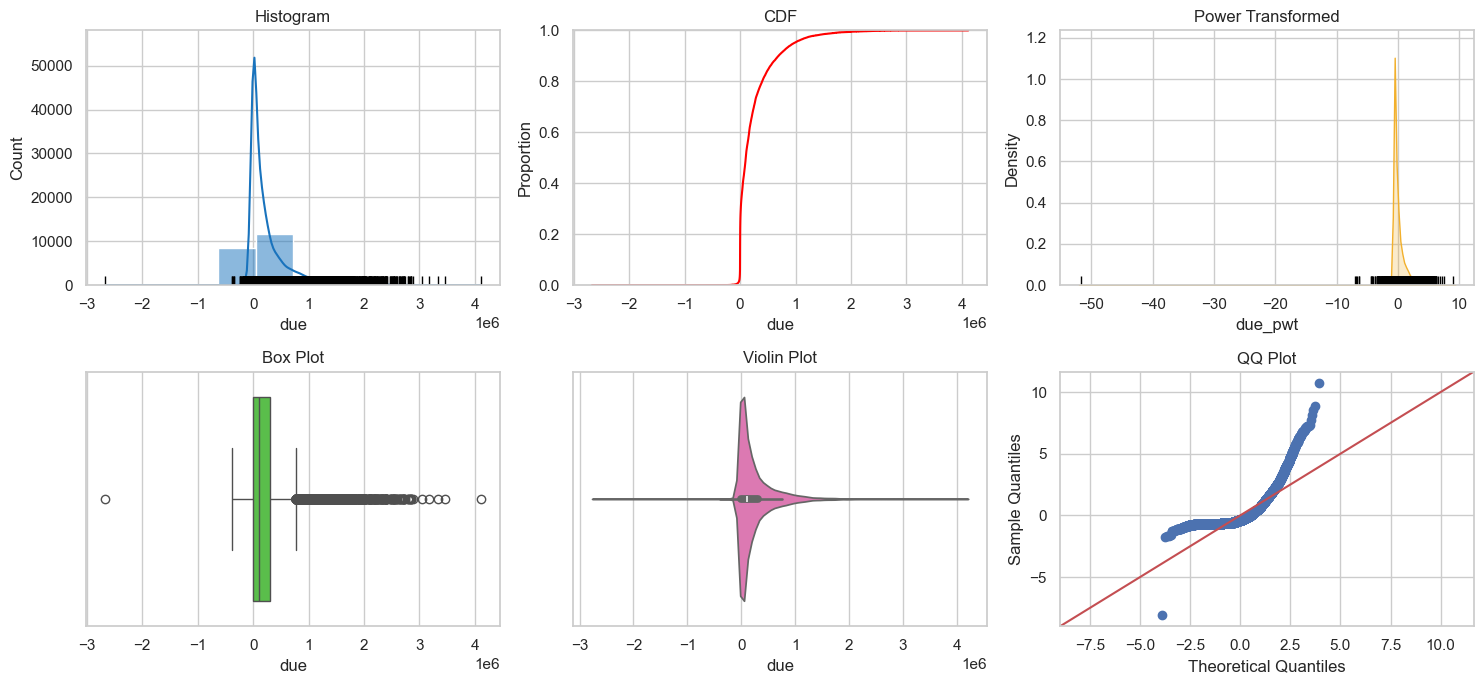

In [158]:
eda_helper.num_univar_plots(df,'due')

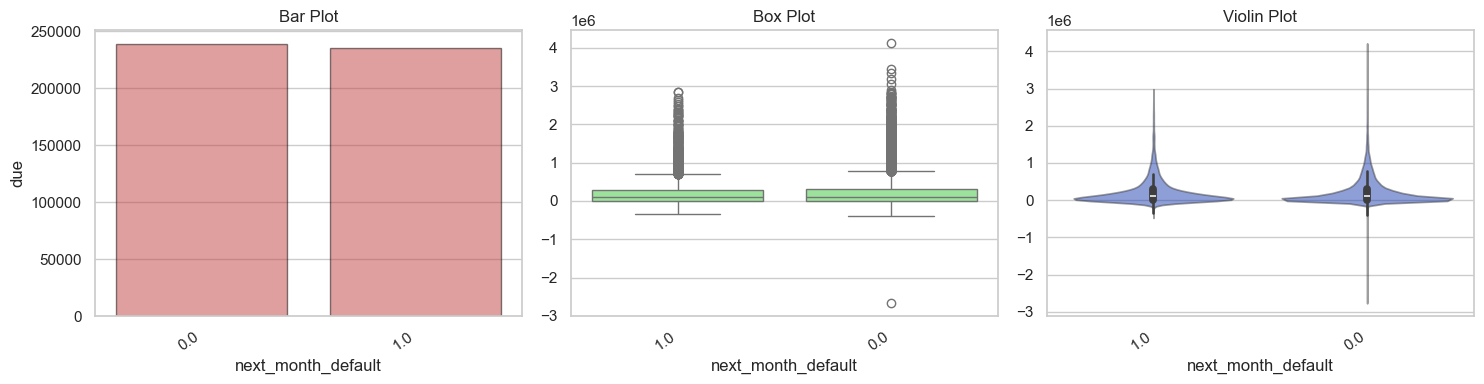

In [159]:
eda_helper.num_cat_bivar_plots(df,'due','next_month_default')

In [160]:
eda_helper.num_cat_hyp_testing(df,'due','next_month_default')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 0.3087601731860603
- p-value              : 0.5784476198179678
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables due and next_month_default are not associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3.596591469594611
- p-value              : 0.057898166815791435
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables due and next_month_default are not associated to each other


## Average Utilization

In [130]:
df['average_utilization']=df['avg_bill_amt']/df['limit_bal']

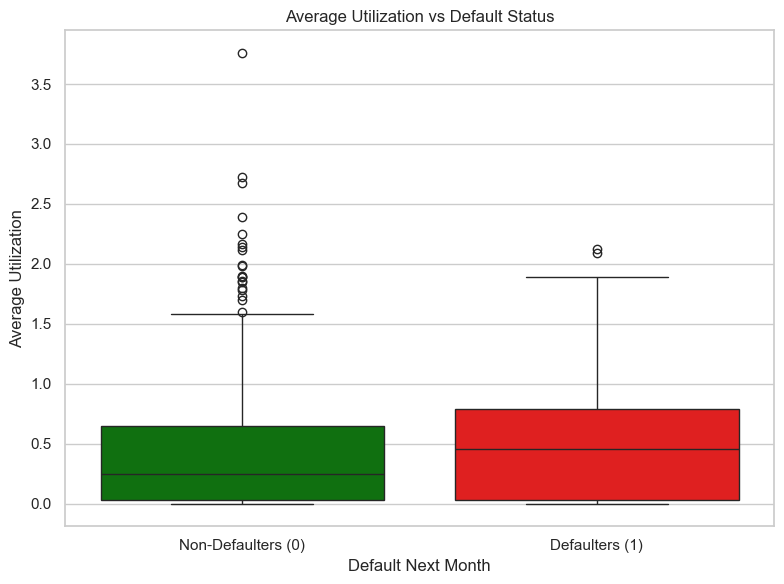

In [131]:
# Set style
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='next_month_default', y='average_utilization', data=df, palette={'0': 'green', '1': 'red'})

# Customize labels
plt.xticks([0, 1], ['Non-Defaulters (0)', 'Defaulters (1)'])
plt.title('Average Utilization vs Default Status')
plt.xlabel('Default Next Month')
plt.ylabel('Average Utilization')
plt.tight_layout()
plt.show()

## Deliquency score

In [132]:
# Create a new column: sum of delay codes for past 6 months
delay_cols = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
df['delinquency_score'] = df[delay_cols].sum(axis=1)

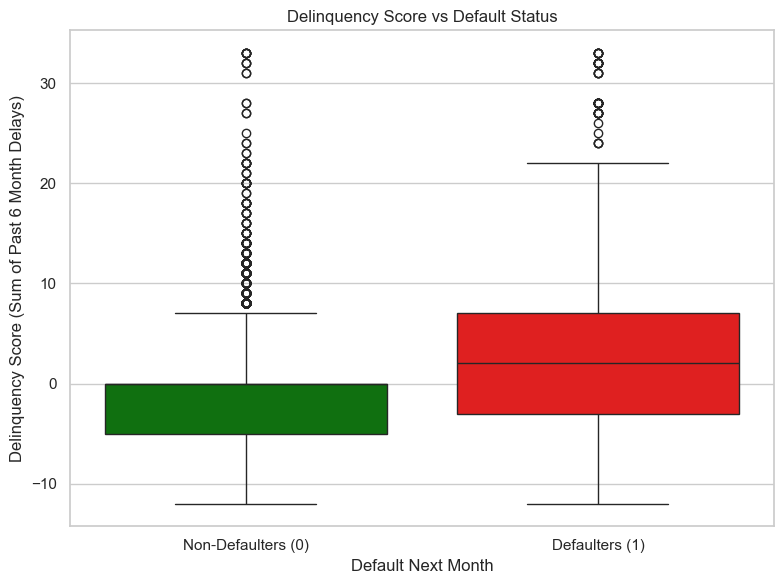

In [133]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='next_month_default',
    y='delinquency_score',
    data=df,
    palette={'0': 'green', '1': 'red'}
)

plt.xticks([0, 1], ['Non-Defaulters (0)', 'Defaulters (1)'])
plt.title('Delinquency Score vs Default Status')
plt.xlabel('Default Next Month')
plt.ylabel('Delinquency Score (Sum of Past 6 Month Delays)')
plt.tight_layout()
plt.show()

In [134]:
eda_helper.num_cat_hyp_testing(df,'delinquency_score','next_month_default')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 1679.4088123370836
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables delinquency_score and next_month_default are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 1245.7315861934535
- p-value              : 7.025916530062378e-273
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables delinquency_score and next_month_default are associated to each other


## Consistency_Score

This is the standard deviation of the payment status values . erratic signals denotes risk in payments

In [135]:
# Calculate standard deviation of pay_amt1 to pay_amt6
pay_cols = ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
df['consistency_score'] = df[pay_cols].std(axis=1)

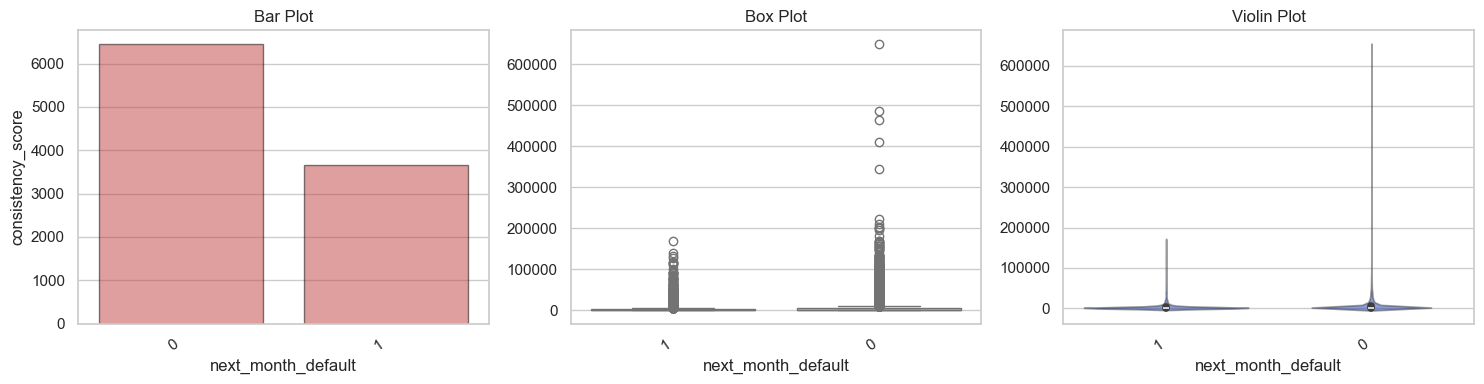

In [136]:
eda_helper.num_cat_bivar_plots(df,'consistency_score','next_month_default')

# Top defaulters

In [137]:
Q1_pay = df['total_pay'].quantile(0.25)
Q3_pay = df['total_pay'].quantile(0.75)
IQR_pay = Q3_pay - Q1_pay
low_payment_threshold = Q1_pay - 1.5 * IQR_pay

# For total_bill (upper outliers)
Q1_bill = df['total_bill'].quantile(0.25)
Q3_bill = df['total_bill'].quantile(0.75)
IQR_bill = Q3_bill - Q1_bill
high_bill_threshold = Q3_bill + 1.5 * IQR_bill

# Step 3: Filter samples
at_risk_customers = df[
    (df['total_pay'] < low_payment_threshold) &
    (df['total_bill'] > high_bill_threshold) &
    (df['next_month_default'] == 1)
]

# Show the result
print(f"Number of at-risk customers: {len(at_risk_customers)}")
at_risk_customers.head()

Number of at-risk customers: 0


,marriage,sex,education,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,pay_amt5,pay_amt6,pay_to_bill_ratio,next_month_default,avg_bill_amt,total_pay,total_bill,average_utilization,delinquency_score,consistency_score


In [140]:
# Step 1: Calculate boxplot threshold for high LIMIT_BAL
Q1_limit = df['limit_bal'].quantile(0.25)
Q3_limit = df['limit_bal'].quantile(0.75)
IQR_limit = Q3_limit - Q1_limit
high_limit_threshold = Q3_limit + 1.5 * IQR_limit

# Step 2: Extract entries with high limit and defaulted
high_limit_defaulters = df[
    (df['limit_bal'] > high_limit_threshold) &
    (df['next_month_default'] == 1)
]

# Step 3: Show results
print(f"Number of high-limit defaulters: {len(high_limit_defaulters)}")
high_limit_defaulters


Number of high-limit defaulters: 11


,marriage,sex,education,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,pay_amt5,pay_amt6,pay_to_bill_ratio,next_month_default,avg_bill_amt,total_pay,total_bill,average_utilization,delinquency_score,consistency_score
941,1,1,2,550000,32.0,0,0,0,0,0,...,158064.20,28839.76,0.16,1,413667.14,395688.50,2482002.83,0.752122,0,75571.592060
4640,1,1,2,550000,32.0,2,0,0,0,0,...,4299.73,158063.97,0.14,1,477428.85,387943.24,2864573.12,0.868052,2,76394.056710
5069,1,1,2,560000,45.0,0,0,0,0,0,...,12130.22,11702.86,0.03,1,366803.63,76383.01,2200821.78,0.655006,0,1101.331100
5183,1,1,2,710000,40.0,-2,-2,-2,-1,2,...,7999.98,5000.14,0.89,1,2614.01,14004.57,15684.08,0.003682,-5,3385.889540
6857,1,0,4,550000,37.0,0,0,0,0,0,...,2511.93,125019.76,0.12,1,231338.65,164981.79,1388031.90,0.420616,0,48142.991452
9329,1,0,3,550000,50.0,2,2,2,0,0,...,0.00,18169.13,0.04,1,495632.72,124432.27,2973796.34,0.901150,8,20196.882074
13750,1,0,1,720000,40.0,0,0,0,0,0,...,2999.83,8960.71,0.04,1,174402.40,37698.15,1046414.39,0.242226,0,2196.326252
15791,1,0,1,600000,53.0,2,2,0,0,0,...,20999.91,20000.21,0.03,1,453090.44,91000.32,2718542.64,0.755151,4,7705.015599
17499,1,1,2,590000,29.0,-2,-2,-2,-1,0,...,1000.04,999.58,0.66,1,1100.87,4386.42,6605.24,0.001866,-7,585.783754
18156,2,1,1,550000,34.0,-1,0,0,0,0,...,2999.85,10010.01,0.10,1,42339.81,26030.80,254038.87,0.076981,-1,2807.512874


In [142]:
low_limit_threshold = Q1_limit - 1.5 * IQR_limit

# Step 2: Extract entries with high limit and defaulted
low_limit_non_defaulters = df[
    (df['limit_bal'] < low_limit_threshold) &
    (df['next_month_default'] == 0)
]

# Step 3: Show results
print(f"Number of low-limit non-defaulters: {len(low_limit_non_defaulters)}")
low_limit_non_defaulters


Number of low-limit non-defaulters: 0


,marriage,sex,education,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,pay_amt5,pay_amt6,pay_to_bill_ratio,next_month_default,avg_bill_amt,total_pay,total_bill,average_utilization,delinquency_score,consistency_score


# Conditional Probability Analysis

In [150]:
df['next_month_default']=df['next_month_default'].astype(np.float64)

In [151]:
# 1. Probability of default given age < 30 and high LIMIT_BAL

# Calculate high limit threshold (above Q3)
q3_limit = df['limit_bal'].quantile(0.75)

# Apply filter for the condition: Age < 30 and High LIMIT_BAL
condition1 = df[(df['age'] < 30) & (df['limit_bal'] > q3_limit)]

# Calculate probability
prob1 = condition1['next_month_default'].mean()
print(f"Probability of default given Age < 30 and High LIMIT_BAL: {prob1:.4f}")


Probability of default given Age < 30 and High LIMIT_BAL: 0.1041


In [153]:
df['education']=df['education'].astype(np.float64)

In [154]:
# 2. Probability of default given education > 2 and high average utilization

# Calculate Q3 for average_utilization
q3_util = df['average_utilization'].quantile(0.75)

# Apply filter
condition2 = df[(df['education'] > 2) & (df['average_utilization'] > q3_util)]

# Calculate probability
prob2 = condition2['next_month_default'].mean()
print(f"Probability of default given Education > 2 and High Utilization: {prob2:.4f}")


Probability of default given Education > 2 and High Utilization: 0.2676


# Null value Analysis

In [162]:
df['age'].isnull().sum()

116

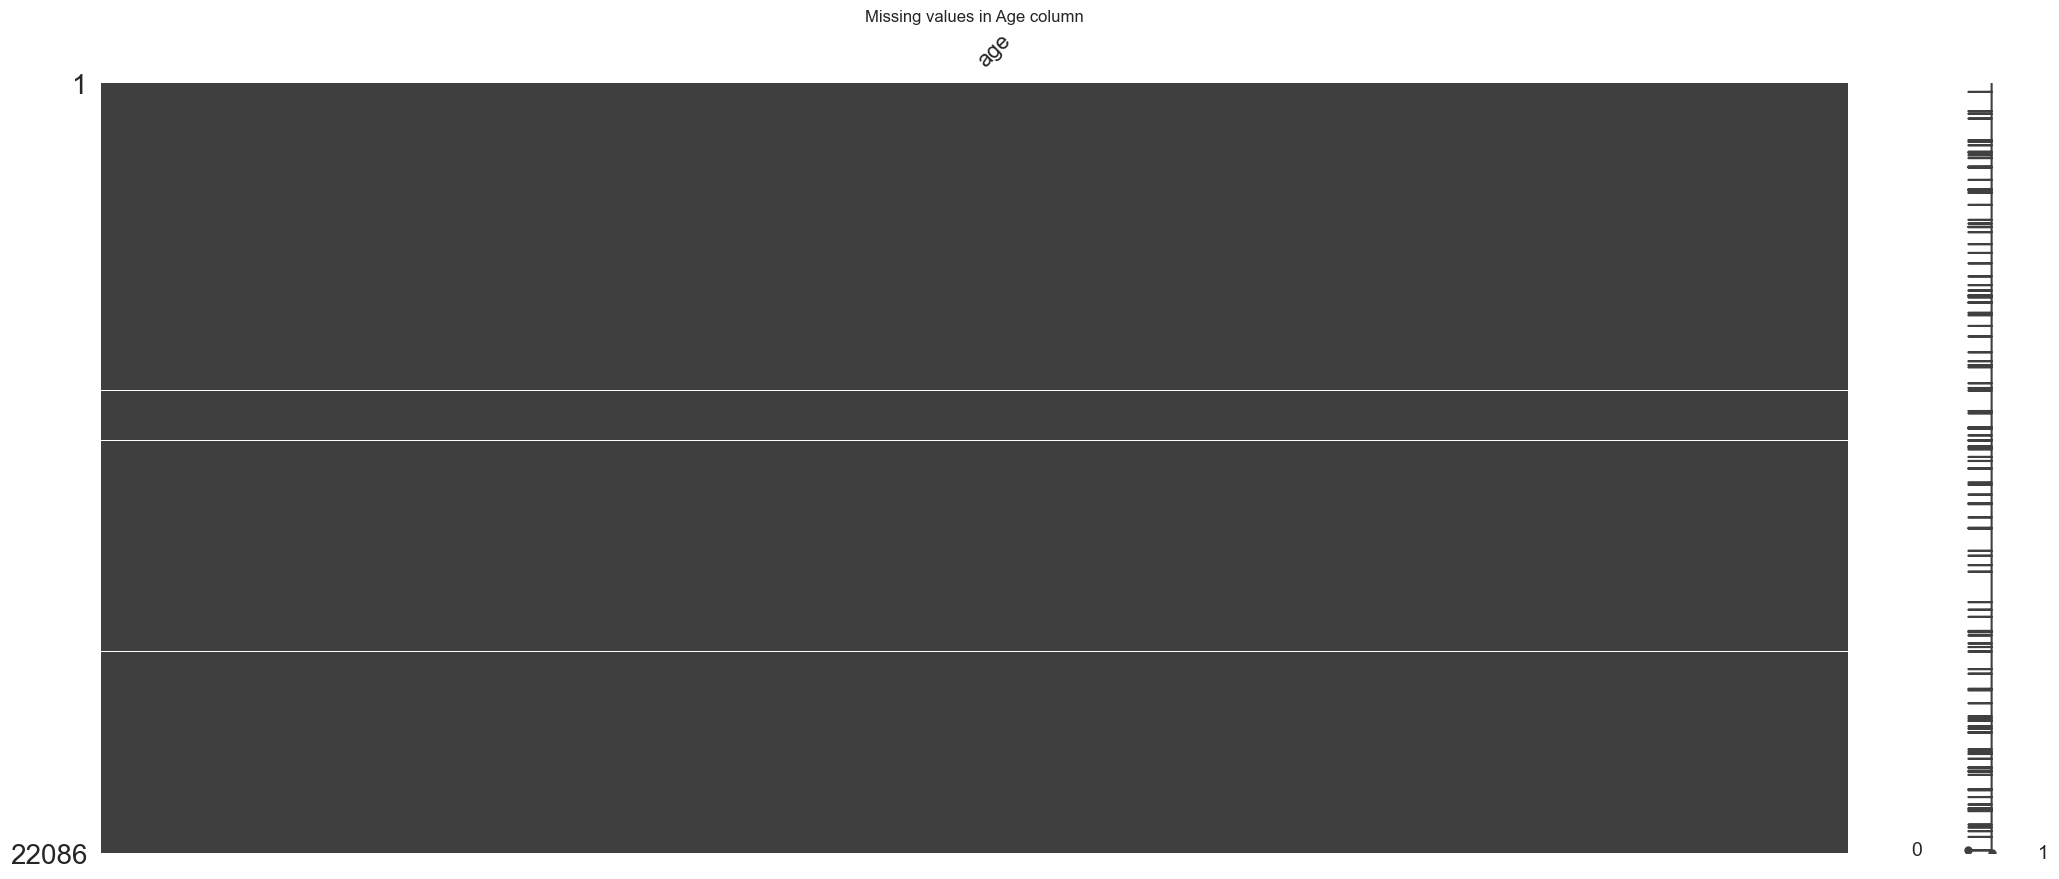

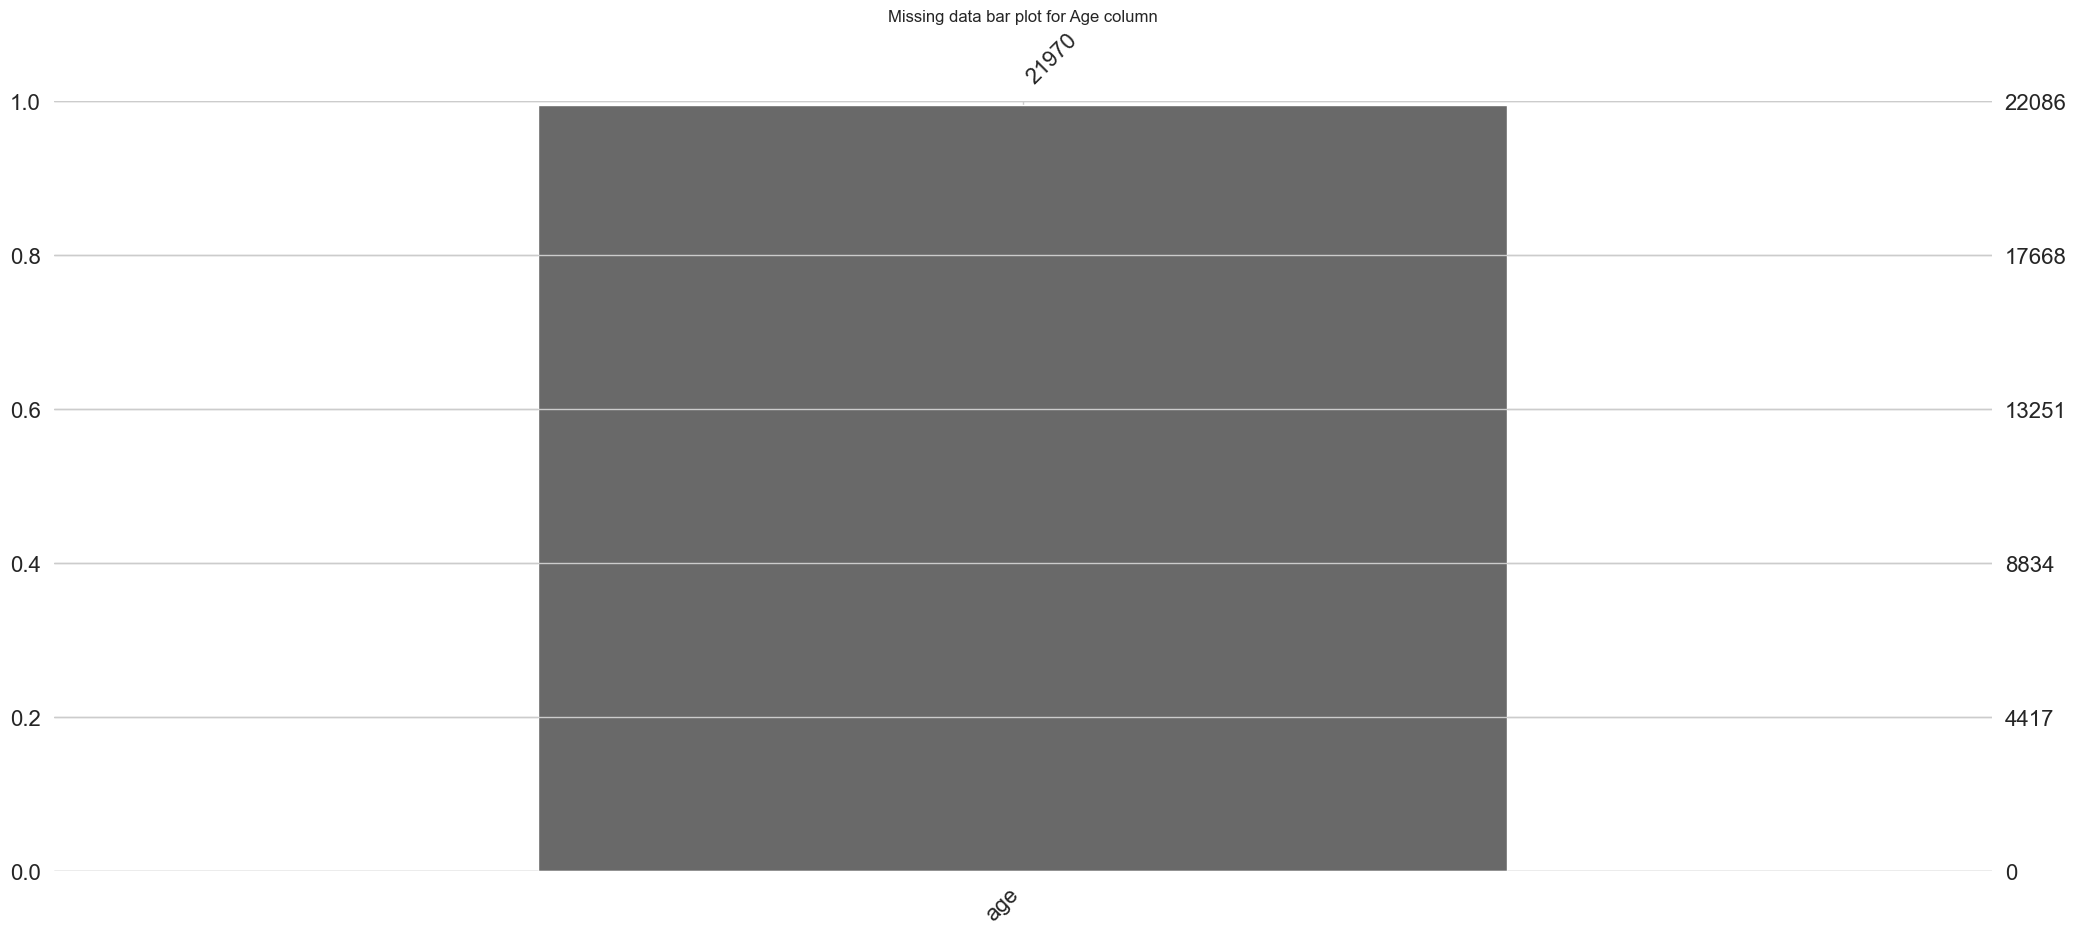

In [173]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing data matrix for just the 'age' column
msno.matrix(df[['age']])
plt.title('Missing values in Age column')
plt.show()

# Or a bar chart (useful if you want to see multiple columns later)
msno.bar(df[['age']])
plt.title('Missing data bar plot for Age column')
plt.show()